In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
dftrain=pd.read_csv('termdeposit_train.csv')

In [9]:
dftrain

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [10]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


### There are 18 columns of which 8 are int64 and 10 are object type. There are no null values in all the columns.

In [11]:
dftrain.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


#### The balance,duration,campaign,pday and previous columns with there min, max and mean values suggest the presencse of ouliers and high variability particularly in balance and duration as they have high standard deviations.

In [12]:
dftest=pd.read_csv('termdeposit_test.csv')

In [13]:
dftest

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [14]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [15]:
dftrain.nunique()

ID            31647
age              76
job              12
marital           3
education         4
default           2
balance        6326
housing           2
loan              2
contact           3
day              31
month            12
duration       1454
campaign         45
pdays           509
previous         38
poutcome          4
subscribed        2
dtype: int64

In [16]:
dftrain.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [20]:
dftrain['poutcome'].unique() # unknown values are present in poutcome

array(['unknown', 'success', 'failure', 'other'], dtype=object)

In [34]:
count_cols=['job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'day', 'month', 'campaign','poutcome', 'subscribed']

In [35]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=(10,7)
plt.rcParams['figure.facecolor']='#FFE5B4'

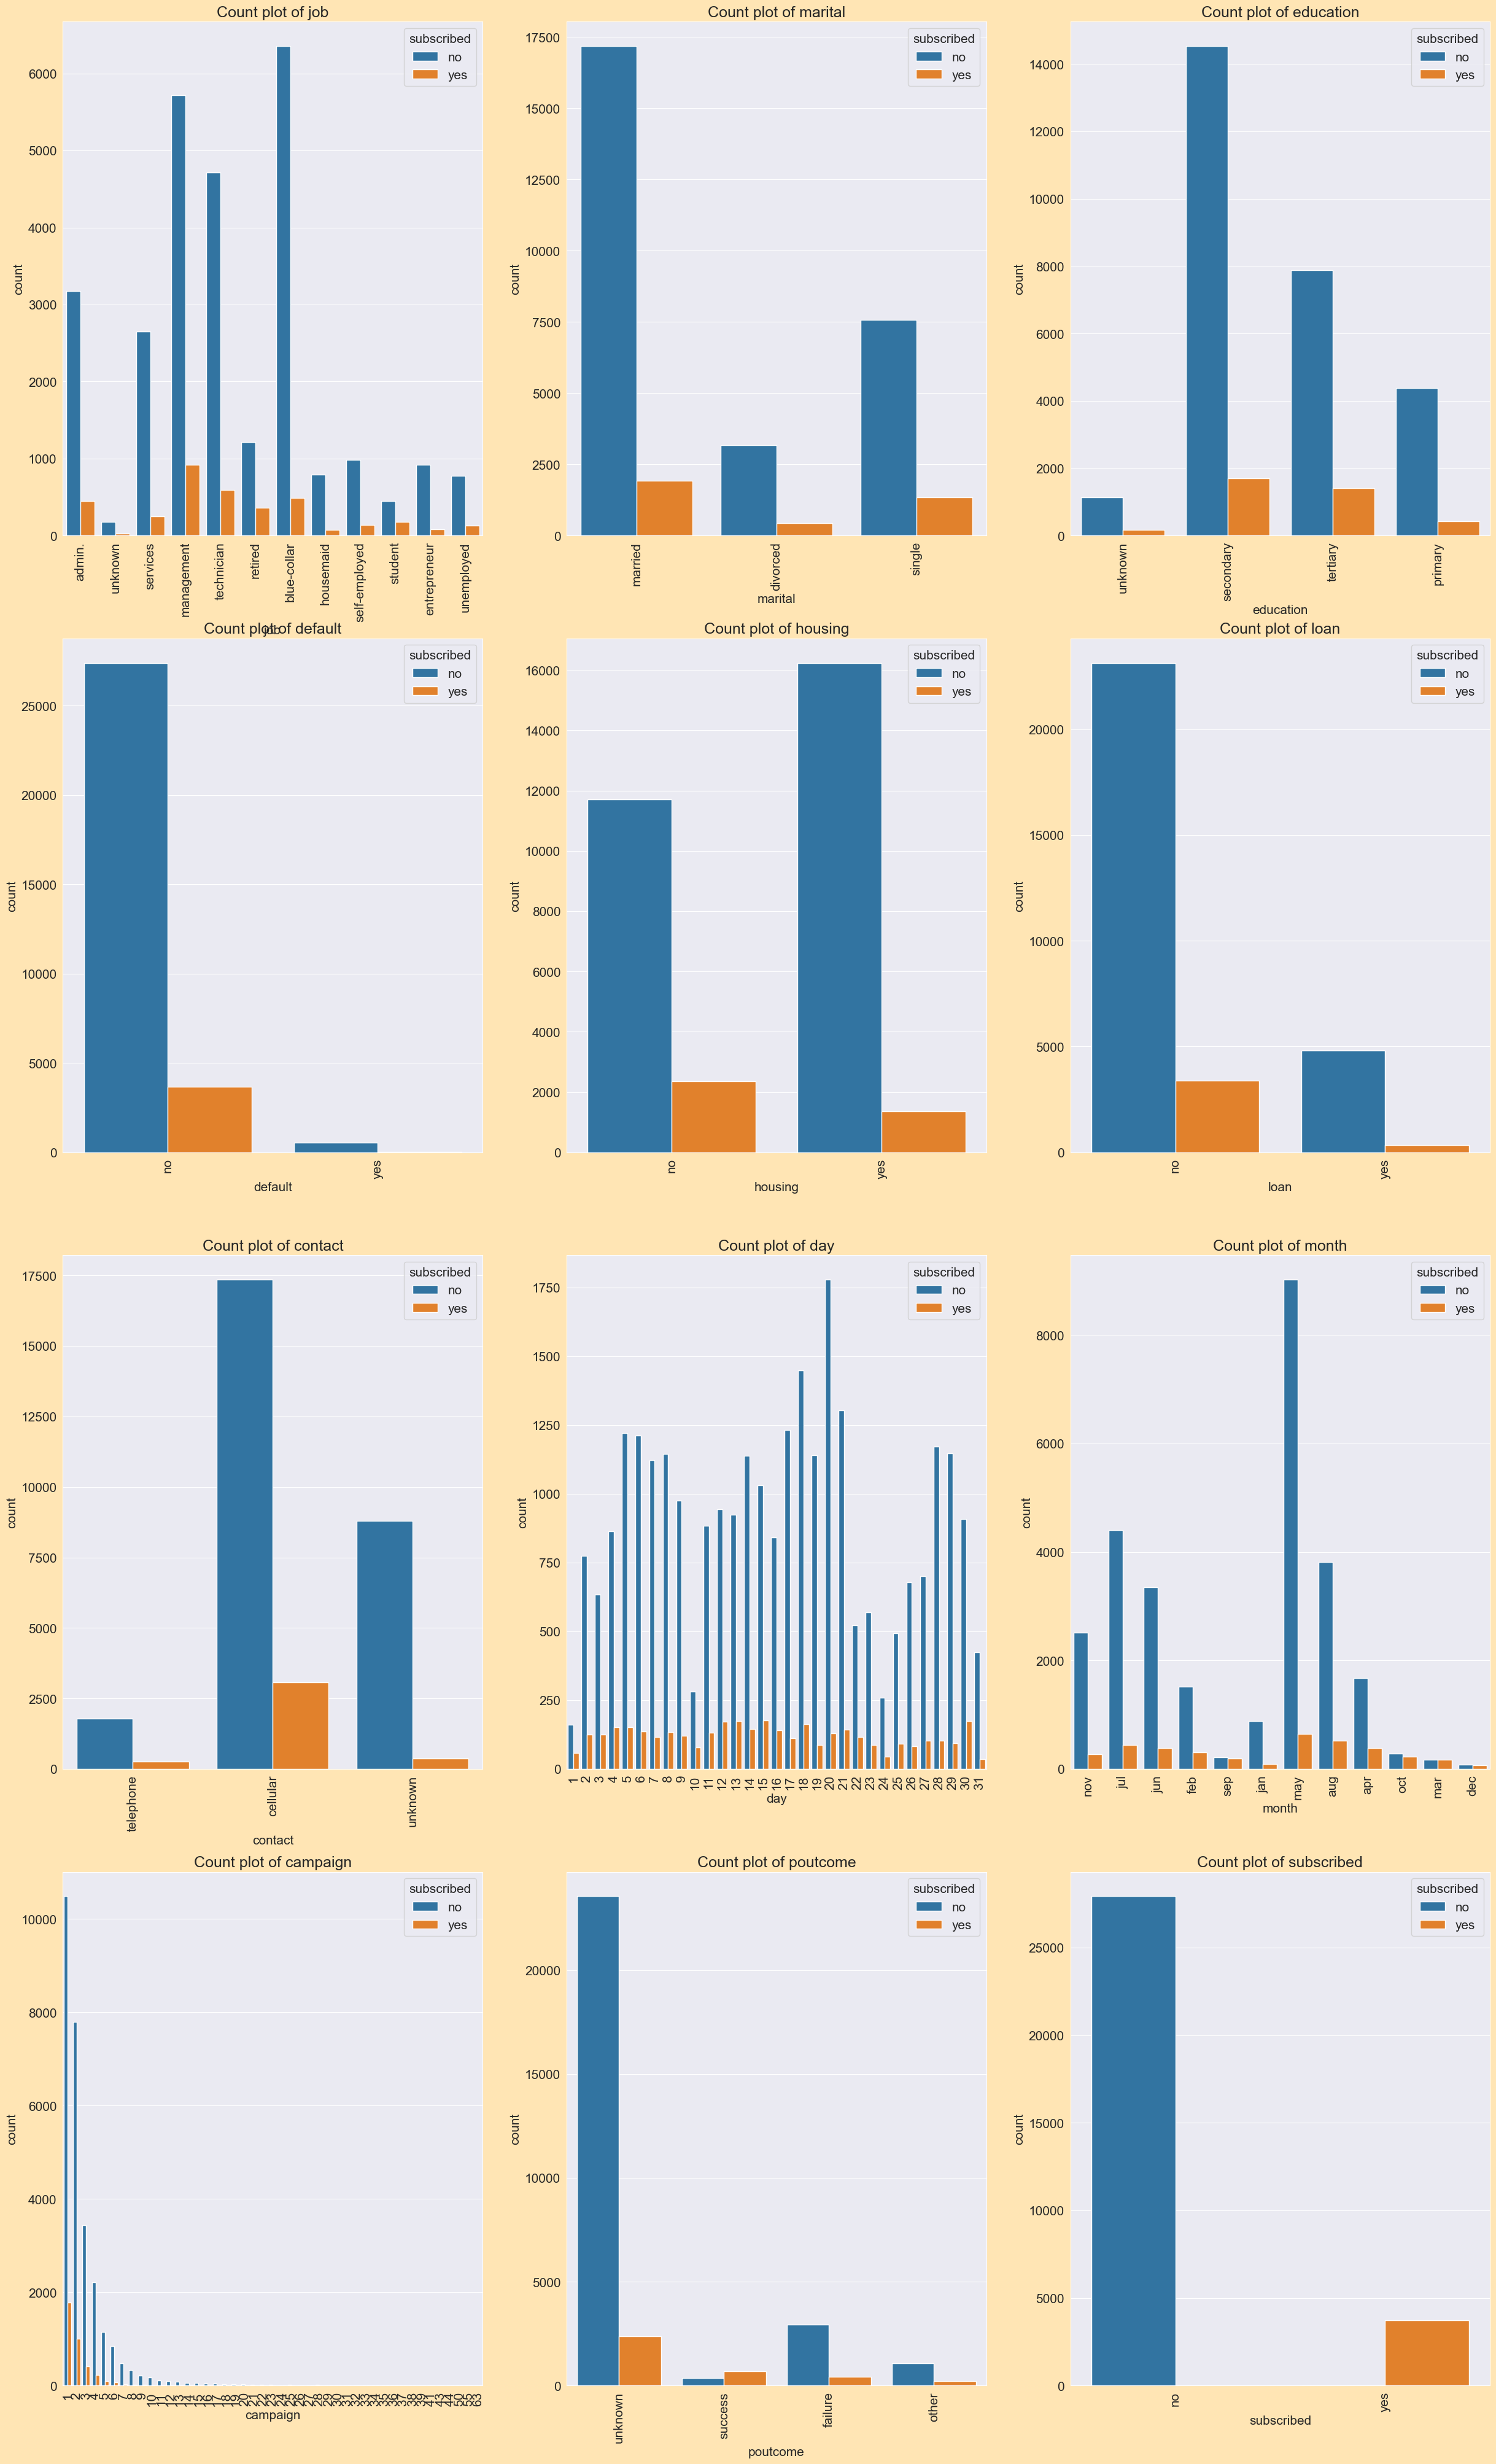

In [113]:
plt.figure(figsize=(30,50))
for i,col in enumerate(count_cols):
    plt.subplot(4,3,i+1)
    sns.countplot(x=col,hue='subscribed',data=dftrain)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=90)

#### Client with Management Job,Single and married,with secondary and tertiary education,non defaulters, with no housing loan or personal loans, contacted using Cellular are more likely to subscribe.

In [69]:
for i in dftrain.columns:
    print(f'VALUE COUNT OF {i}')
    print(dftrain[i].value_counts())
    print('----------------------------------------------')

VALUE COUNT OF ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64
----------------------------------------------
VALUE COUNT OF age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64
----------------------------------------------
VALUE COUNT OF job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64
----------------------------------------------
VALUE COUNT OF marital
married     19095
single       8922
divorced     3630
Name: marital, dtype: int64
----------------------------------------------
VALUE COUNT OF education
secondary    16224
ter

#### We can see here that job,education,contact and poutcome have an unknown category and the frequency is large (poutcome). This will confuse the model as distinguishing between unknown of one column from the other will be a problem. We will be treating this issue in the later stage

In [161]:
for i in dftest.columns:
    print(f'VALUE COUNT OF {i}')
    print(dftest[i].value_counts())
    print('----------------------------------------------')

VALUE COUNT OF ID
38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64
----------------------------------------------
VALUE COUNT OF age
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64
----------------------------------------------
VALUE COUNT OF job
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64
----------------------------------------------
VALUE COUNT OF marital
married     8119
single      3868
divorced    1577
Name: marital, dtype: int64
----------------------------------------------
VALUE COUNT OF education
secondary    6978
tertiary     4000


In [274]:
# assessing the impact of poutcome categore on target variable
poutcome_cats=dftrain.groupby(dftrain['poutcome'])['subscribed'].value_counts()

In [275]:
poutcome_cats


poutcome          subscribed
failure           0              2931
                  1               431
other             0              1071
                  1               217
success           1               694
                  0               374
unknown_poutcome  0             23556
                  1              2373
Name: subscribed, dtype: int64

#### clients whose poutcome was success are more likely to subscribe with a 64% subscription rate

In [160]:
pd.DataFrame(dftrain.groupby(dftrain['education'])['subscribed'].value_counts()).head(33)

subscribed
education subscribed            
primary   no                4381
          yes                427
secondary no               14527
          yes               1697
tertiary  no                7886
          yes               1415
unknown   no                1138
          yes                176

In [140]:
dftrain.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [159]:
dftrain

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [167]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  int64 
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  int64 
 8   loan        31647 non-null  int64 
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  int64 
dtypes: int64(12), object(6)
memory usage: 4.3+ MB


In [163]:
# Using label encoder for binary categorical columns of training dataset
from sklearn.preprocessing import LabelEncoder
binary=['default','housing', 'loan']
le=LabelEncoder()
for col in binary:
    dftrain[col]=le.fit_transform(dftrain[col])

In [236]:
# Using label encoder for binary categorical columns of test dataset
binary_t=['default','housing', 'loan']
let=LabelEncoder()
for col in binary_t:
    dftest[col]=let.fit_transform(dftest[col])

In [165]:
# Using label encoder on subscribed column of training dataset
dftrain['subscribed']=le.fit_transform(dftrain['subscribed'])

In [238]:
dftest

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,0,118,1,0,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,0,2787,0,0,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,0,144,1,0,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,0,3777,1,0,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,0,-705,0,1,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,0,45,0,0,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,0,2281,1,0,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,0,285,1,0,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,0,464,0,0,cellular,9,nov,208,2,91,3,success


In [166]:
dftrain

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,0,1933,0,0,telephone,19,nov,44,2,-1,0,unknown,0
1,40576,31,unknown,married,secondary,0,3,0,0,cellular,20,jul,91,2,-1,0,unknown,0
2,15320,27,services,married,secondary,0,891,1,0,cellular,18,jul,240,1,-1,0,unknown,0
3,43962,57,management,divorced,tertiary,0,3287,0,0,cellular,22,jun,867,1,84,3,success,1
4,29842,31,technician,married,secondary,0,119,1,0,cellular,4,feb,380,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,0,0,1,0,cellular,12,may,116,2,-1,0,unknown,0
31643,40178,53,management,divorced,tertiary,0,380,0,1,cellular,5,jun,438,2,-1,0,unknown,1
31644,19710,32,management,single,tertiary,0,312,0,0,cellular,7,aug,37,3,-1,0,unknown,0
31645,38556,57,technician,married,secondary,0,225,1,0,telephone,15,may,22,7,337,12,failure,0


In [168]:
# Handling unknown values in training dataset by replacing unknowns with column specific entries
dftrain['poutcome']=dftrain['poutcome'].replace('unknown', 'unknown_poutcome')
dftrain['contact']=dftrain['contact'].replace('unknown','unknown_contact')
dftrain['job']=dftrain['job'].replace('unknown','unknown_job')

In [239]:
# Handling unknown values in testing dataset by replacing unknowns with column specific entries
dftest['poutcome']=dftest['poutcome'].replace('unknown', 'unknown_poutcome')
dftest['contact']=dftest['contact'].replace('unknown','unknown_contact')
dftest['job']=dftest['job'].replace('unknown','unknown_job')

In [175]:
print(dftrain['poutcome'].value_counts())
print(dftrain['job'].value_counts())
print(dftrain['contact'].value_counts())

unknown_poutcome    25929
failure              3362
other                1288
success              1068
Name: poutcome, dtype: int64
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown_job       206
Name: job, dtype: int64
cellular           20423
unknown_contact     9177
telephone           2047
Name: contact, dtype: int64


In [240]:
print(dftest['poutcome'].value_counts())
print(dftest['job'].value_counts())
print(dftest['contact'].value_counts())

unknown_poutcome    11030
failure              1539
other                 552
success               443
Name: poutcome, dtype: int64
blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown_job        82
Name: job, dtype: int64
cellular           8862
unknown_contact    3843
telephone           859
Name: contact, dtype: int64


In [176]:
dftrain['education'].value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

In [178]:
#Making a copy of training dataset 
dfcopy=dftrain.copy()

In [179]:
# using ordinal encoder on known order in education column of training dataset simultaneously filling unknown category with -1 so its not included in the order
from sklearn.preprocessing import OrdinalEncoder

edu_order=['primary','secondary','tertiary']
ordinal=OrdinalEncoder(categories=[edu_order])

ordinal_encoder = OrdinalEncoder(categories=[edu_order], handle_unknown='use_encoded_value', unknown_value=-1)

dfcopy['education_encoded'] = ordinal_encoder.fit_transform(dfcopy[['education']])


In [241]:
#Similarly making a copy of test dataset
dftest_copy=dftest.copy()

In [242]:
# using ordinal encoder on known order in education column of test dataset simultaneously filling unknown category with -1 so its not included in the order
from sklearn.preprocessing import OrdinalEncoder

edu_cats=['primary','secondary','tertiary']
ordinal=OrdinalEncoder(categories=[edu_cats])

ordinal_encoder = OrdinalEncoder(categories=[edu_cats], handle_unknown='use_encoded_value', unknown_value=-1)

dftest_copy['education_encoded'] = ordinal_encoder.fit_transform(dftest_copy[['education']])


In [189]:
# Dropping education column after being encoded in both training and test datasets
dfcopy.drop('education',axis=1,inplace=True)

In [244]:
dftest_copy.drop('education',axis=1,inplace=True)

In [185]:
# using OneHotEncoding on the poutcome,contact and job columns of training data
dfcopy = pd.get_dummies(dfcopy, columns=['poutcome', 'contact', 'job'])

In [196]:
# Using OneHotEncoder on month. It got left out above
dfcopy = pd.get_dummies(dfcopy, columns=['month'])

In [247]:
# using OneHotEncoding on the poutcome,contact and job columns of testing dataset
dftest_copy = pd.get_dummies(dftest_copy, columns=['poutcome', 'contact', 'job','month'])

In [187]:
# To see all columns in the dataset
pd.set_option('display.max_columns', None)

In [251]:
#Dropping id column in test dataset
dftest_copy.drop('ID',axis=1,inplace=True)

In [252]:
dftest_copy.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'education_encoded',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown_poutcome', 'contact_cellular', 'contact_telephone',
       'contact_unknown_contact', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown_job', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [250]:
dfcopy.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'subscribed',
       'education_encoded', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown_poutcome', 'contact_cellular',
       'contact_telephone', 'contact_unknown_contact', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown_job',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

In [193]:
dfcopy['marital'].value_counts()

married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

In [194]:
# Replacing values in marital column in training and testing datasets with 0,1,2
dfcopy['marital']=dfcopy['marital'].replace({'single':0,'married':1,'divorced':2})

In [253]:
dftest_copy['marital']=dftest_copy['marital'].replace({'single':0,'married':1,'divorced':2})

In [254]:
dftest_copy

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,education_encoded,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown_poutcome,contact_cellular,contact_telephone,contact_unknown_contact,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown_job,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,32,1,0,118,1,0,15,20,6,-1,0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,78,2,0,2787,0,0,1,372,1,-1,0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,31,0,0,144,1,0,16,676,1,-1,0,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,57,0,0,3777,1,0,13,65,2,-1,0,0.0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,45,2,0,-705,0,1,3,111,1,-1,0,1.0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,1,0,45,0,0,28,148,4,-1,0,2.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
13560,54,1,0,2281,1,0,20,158,1,-1,0,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
13561,35,1,0,285,1,0,29,136,1,-1,0,0.0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
13562,29,0,0,464,0,0,9,208,2,91,3,1.0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [195]:
dfcopy

,ID,age,marital,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,subscribed,education_encoded,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown_poutcome,contact_cellular,contact_telephone,contact_unknown_contact,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown_job
0,26110,56,1,0,1933,0,0,19,nov,44,2,-1,0,0,-1.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1,40576,31,1,0,3,0,0,20,jul,91,2,-1,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,15320,27,1,0,891,1,0,18,jul,240,1,-1,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,43962,57,2,0,3287,0,0,22,jun,867,1,84,3,1,2.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,29842,31,1,0,119,1,0,4,feb,380,1,-1,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,0,0,0,1,0,12,may,116,2,-1,0,0,2.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31643,40178,53,2,0,380,0,1,5,jun,438,2,-1,0,1,2.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31644,19710,32,0,0,312,0,0,7,aug,37,3,-1,0,0,2.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
31645,38556,57,1,0,225,1,0,15,may,22,7,337,12,0,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [198]:
#dropping id from training data
dfcopy.drop('ID',axis=1,inplace=True)

In [199]:
dfcopy.columns

Index(['age', 'marital', 'default', 'balance', 'housing', 'loan', 'day',
       'duration', 'campaign', 'pdays', 'previous', 'subscribed',
       'education_encoded', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown_poutcome', 'contact_cellular',
       'contact_telephone', 'contact_unknown_contact', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown_job',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep'],
      dtype='object')

<Axes: >

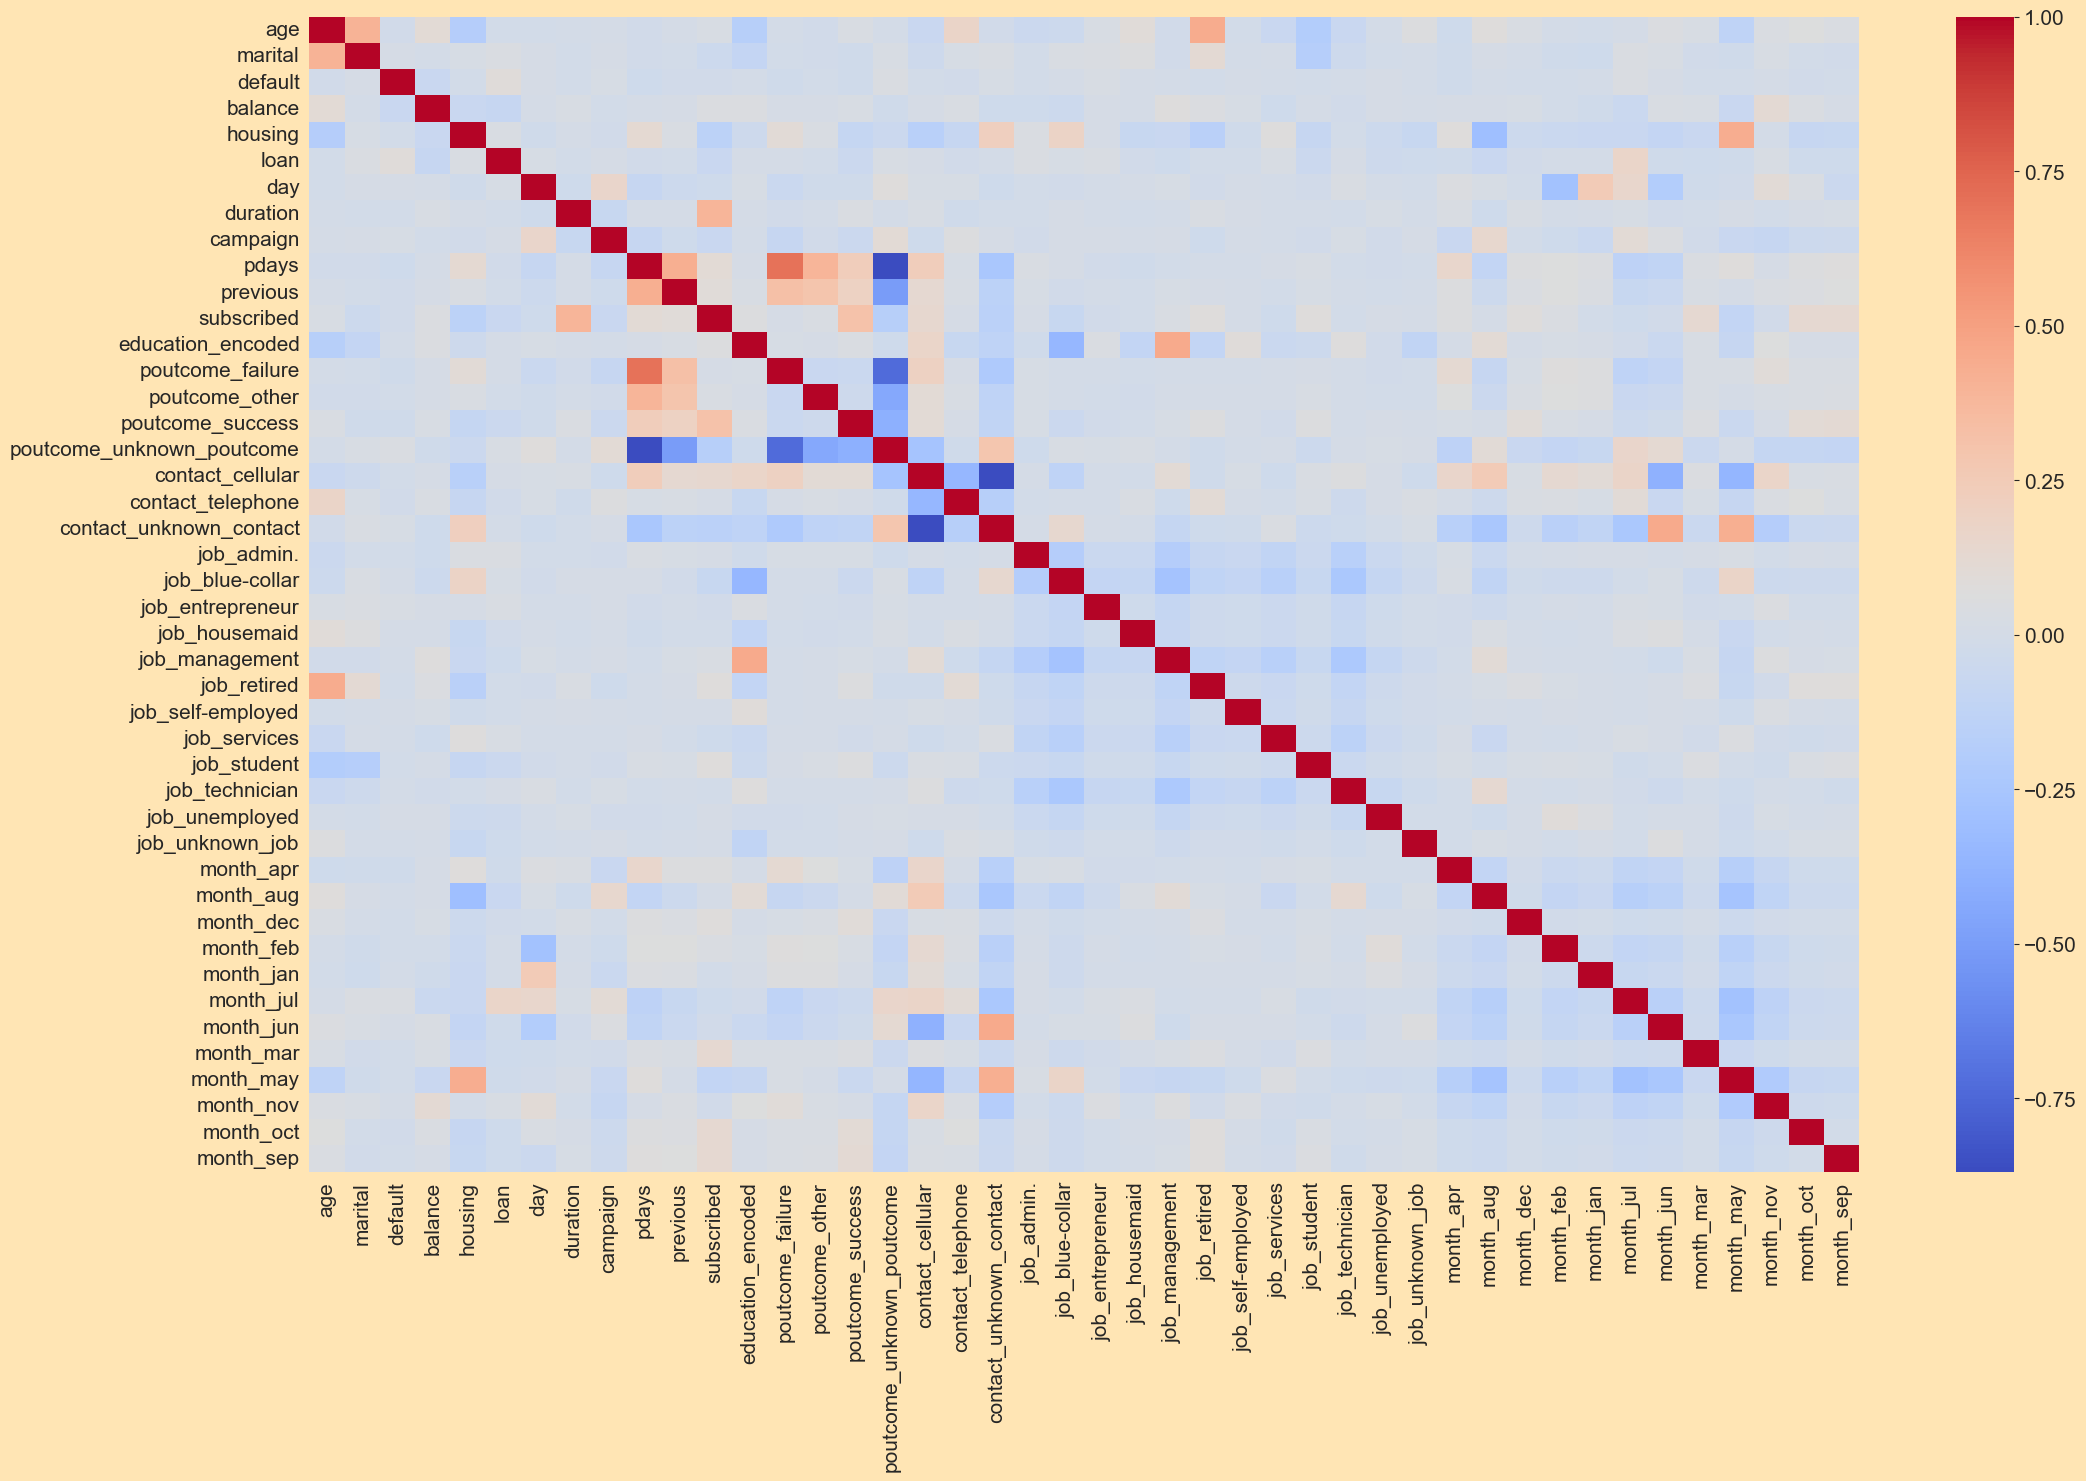

In [208]:
plt.figure(figsize=(25,15))
sns.heatmap(dfcopy.corr(),cmap='coolwarm')

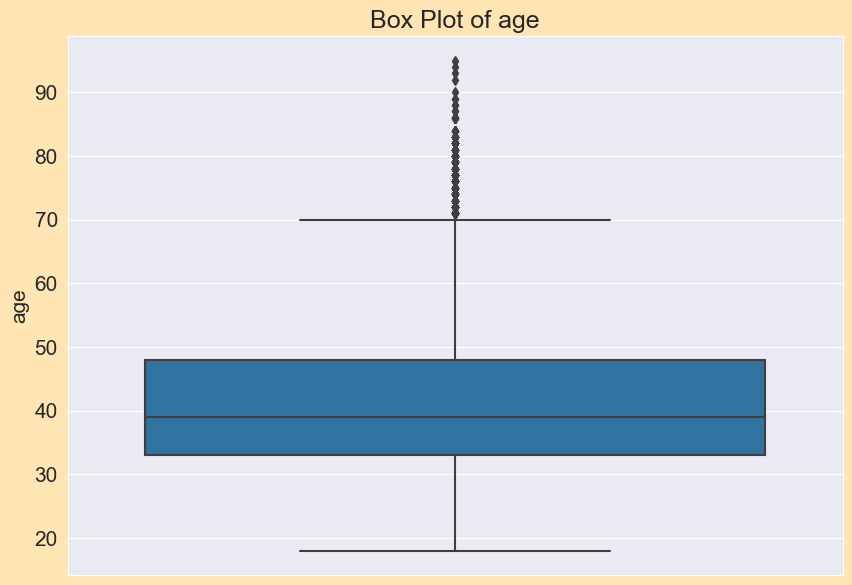

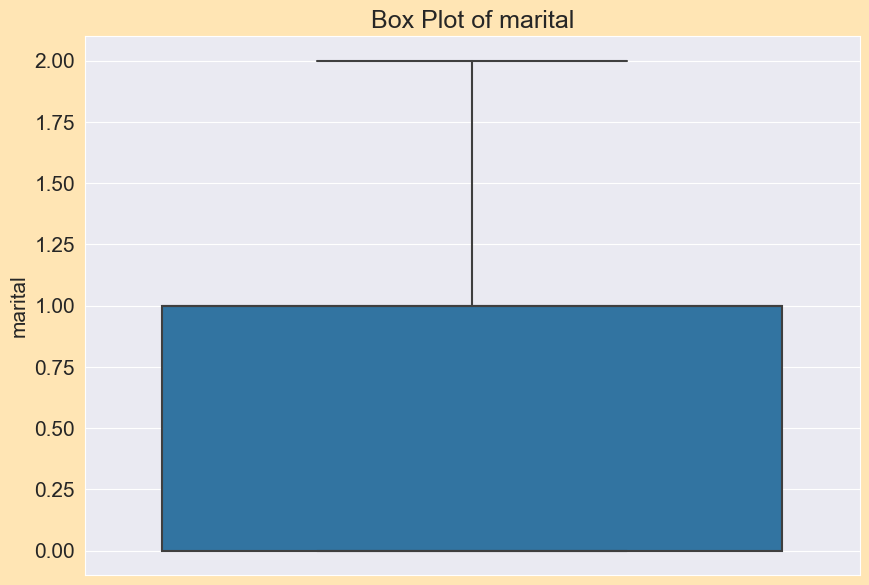

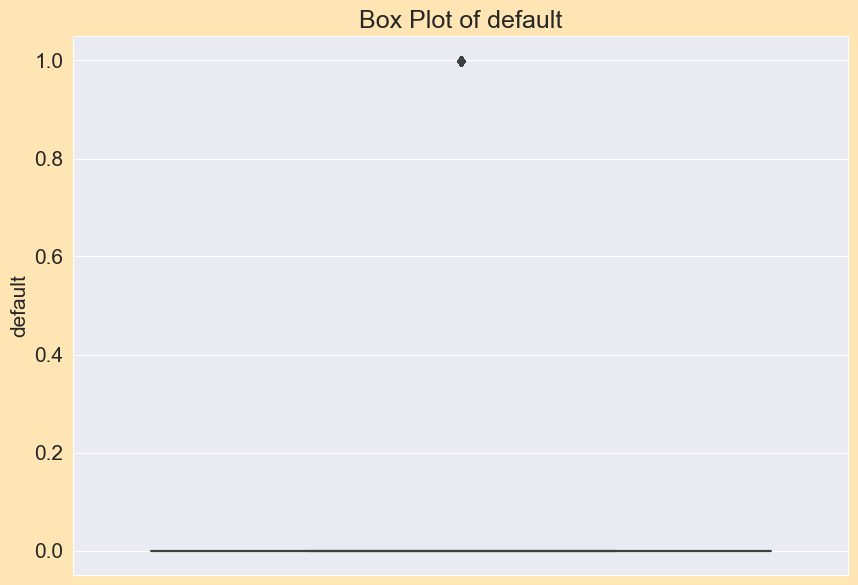

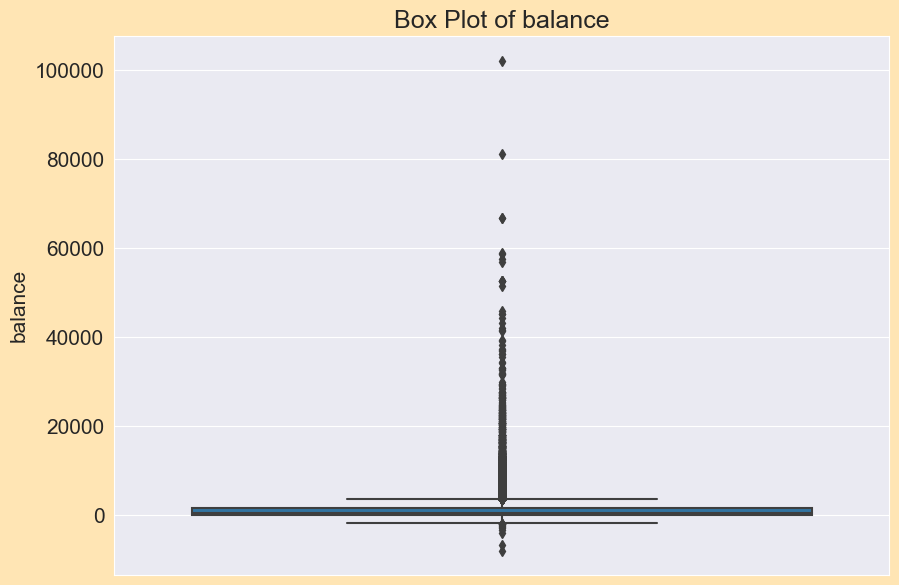

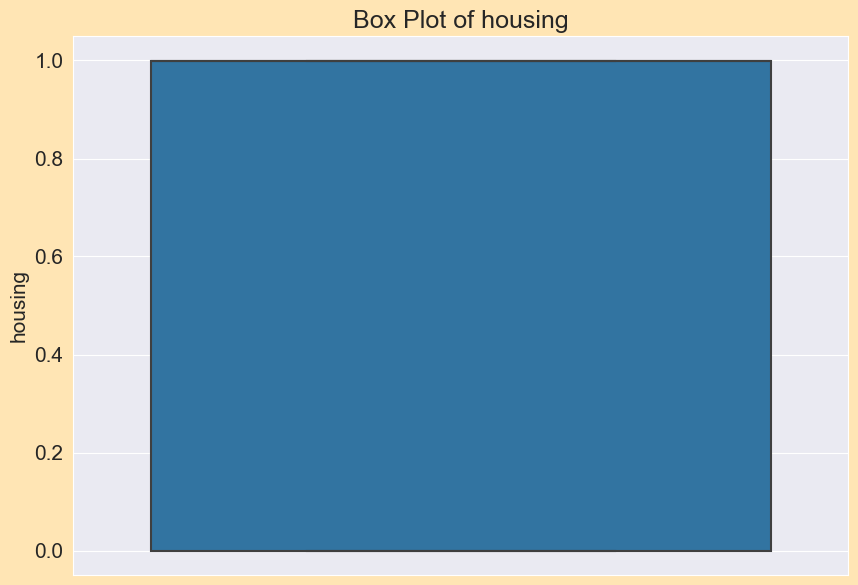

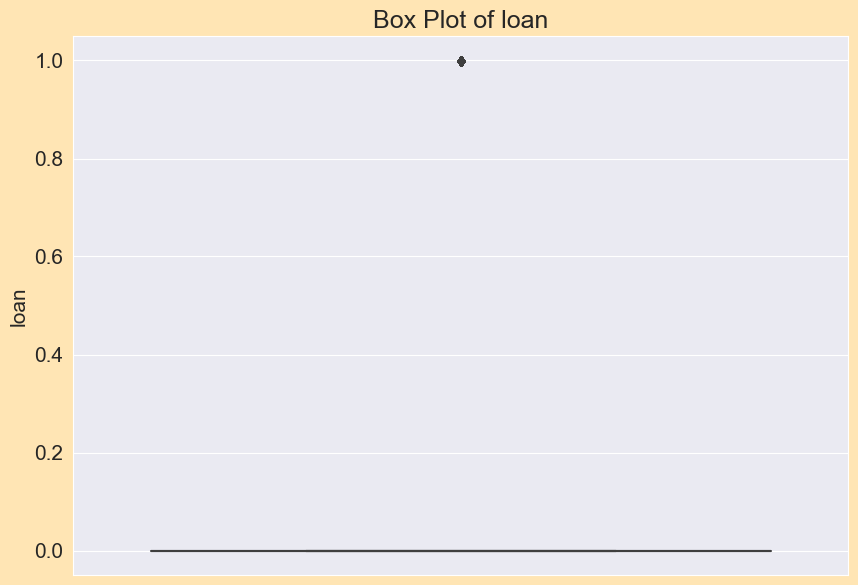

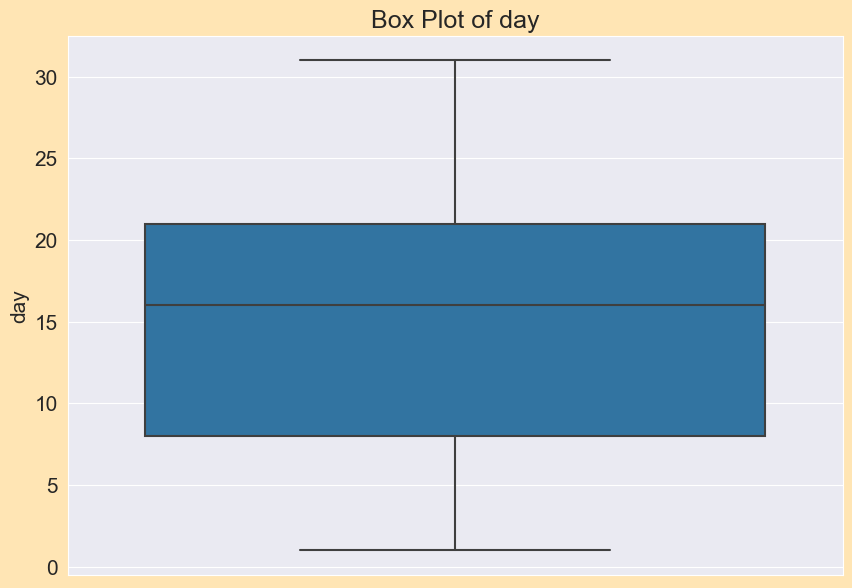

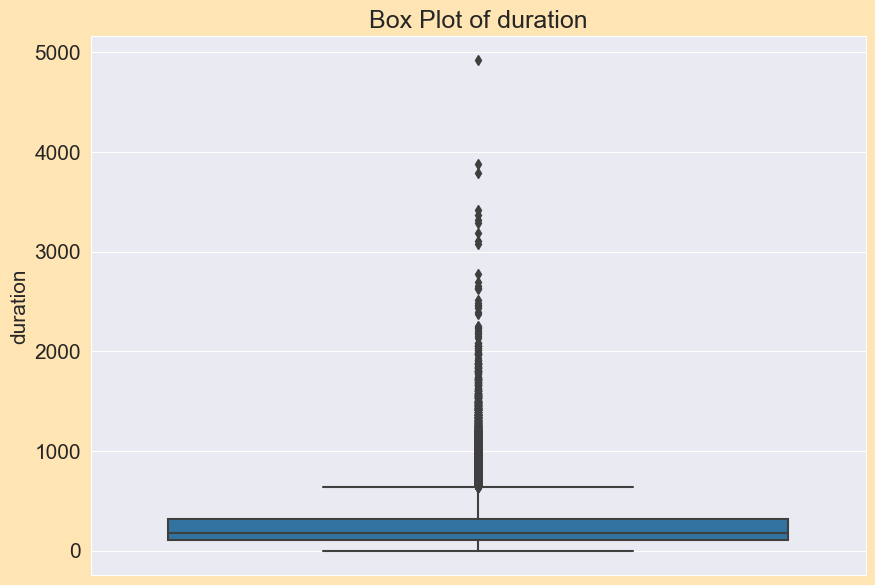

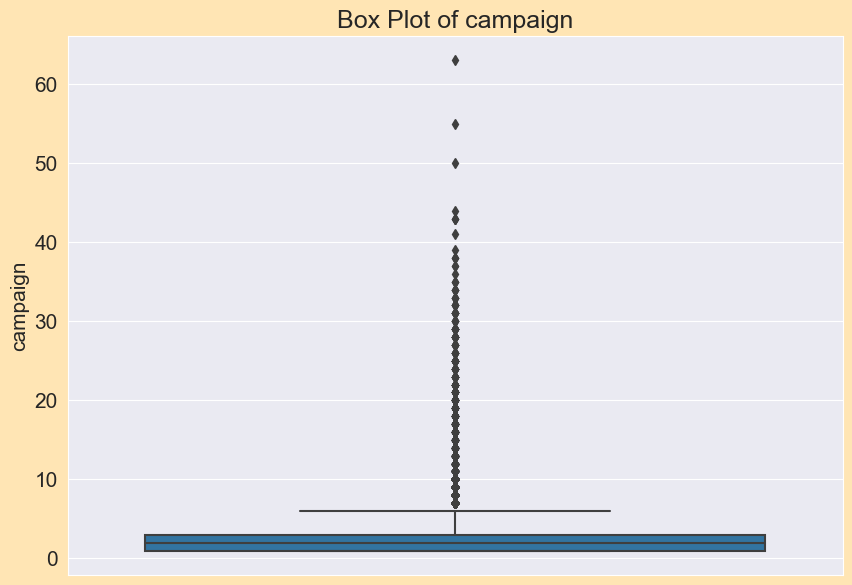

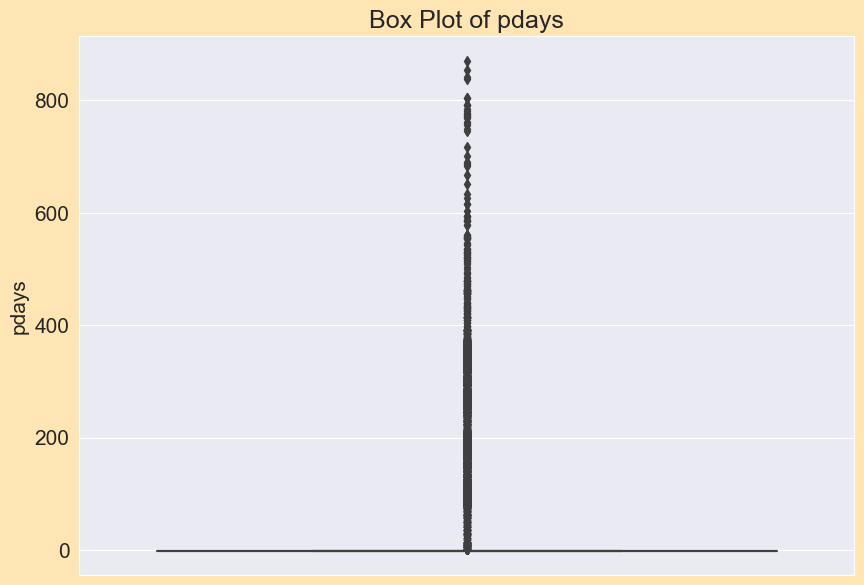

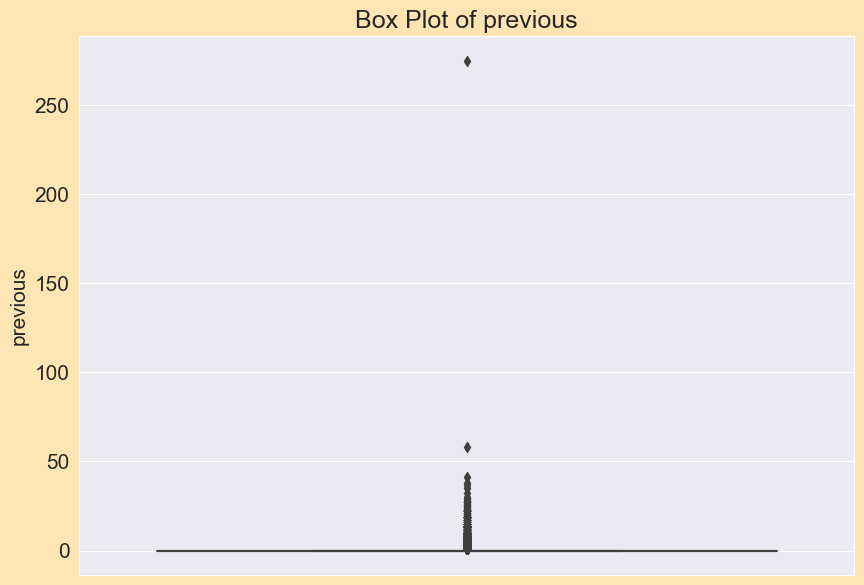

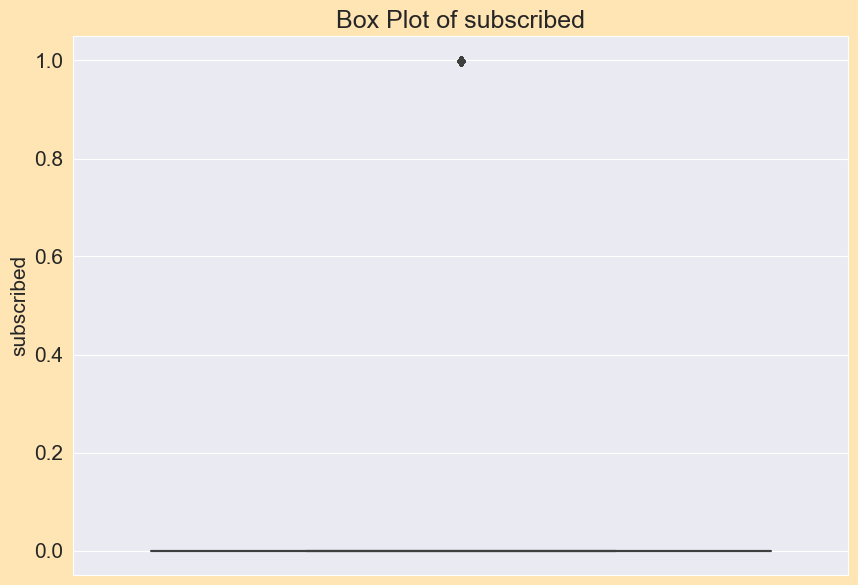

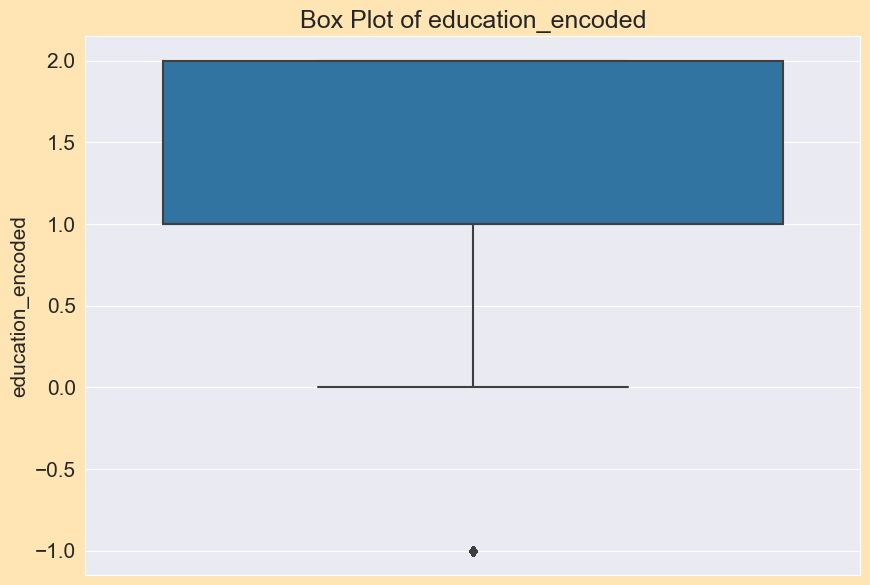

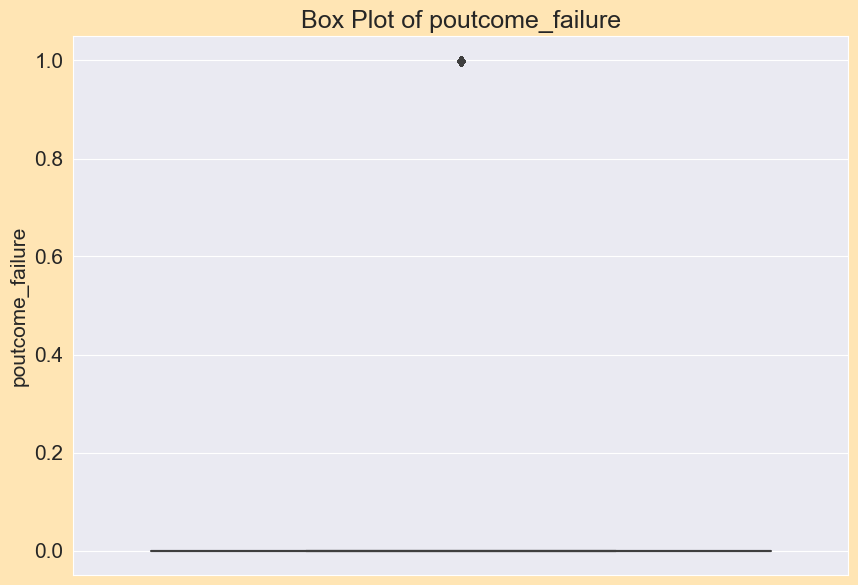

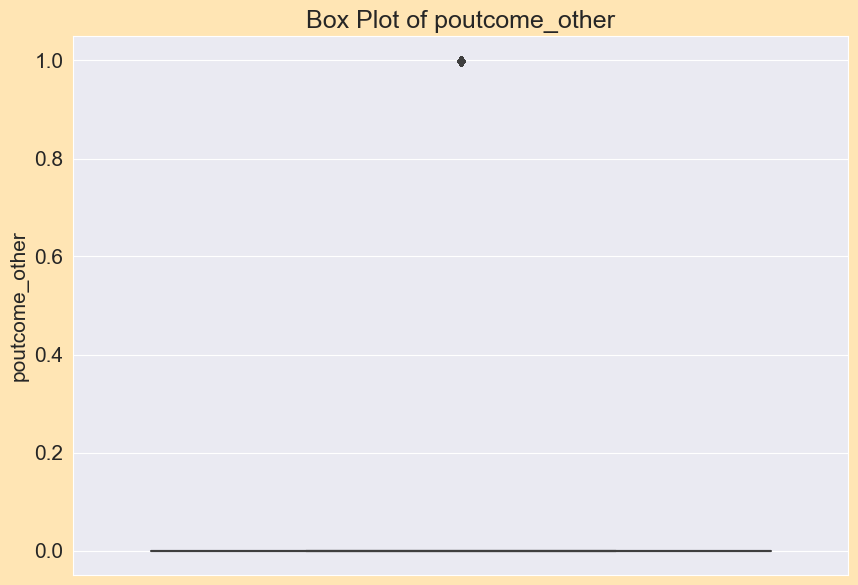

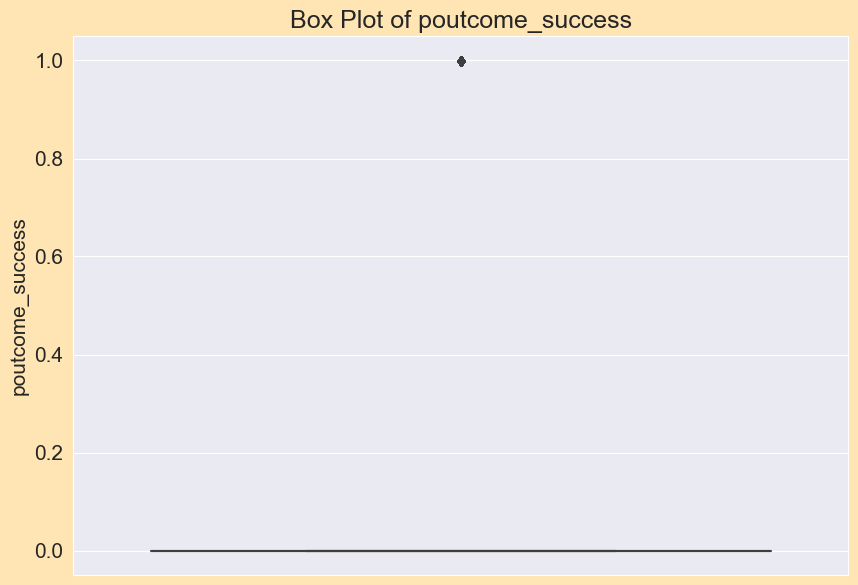

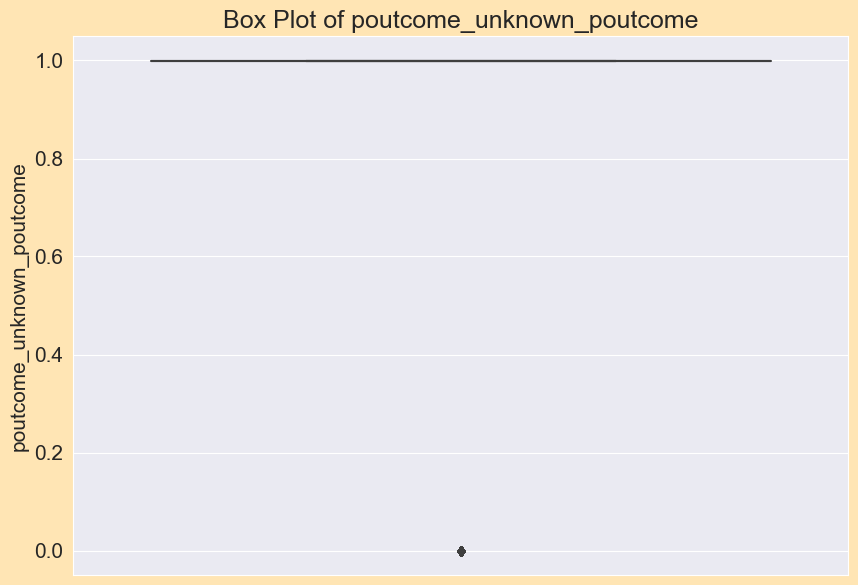

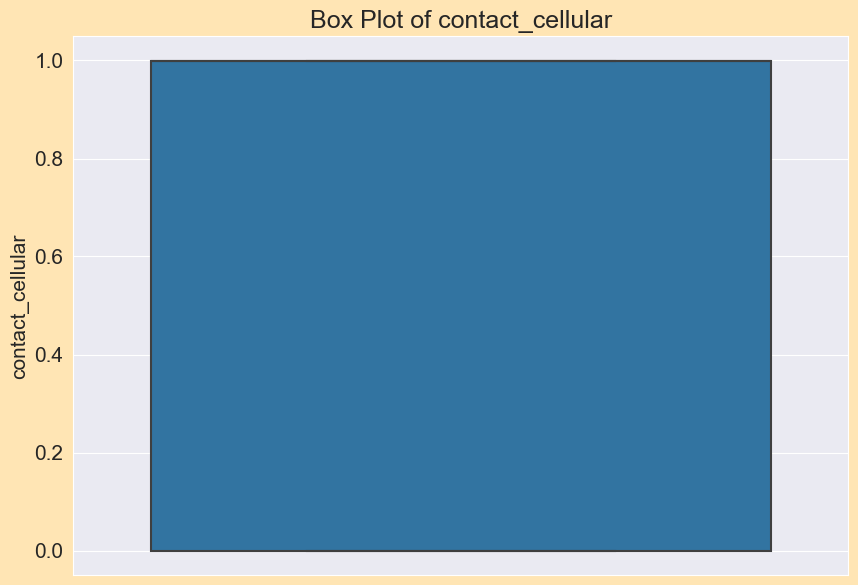

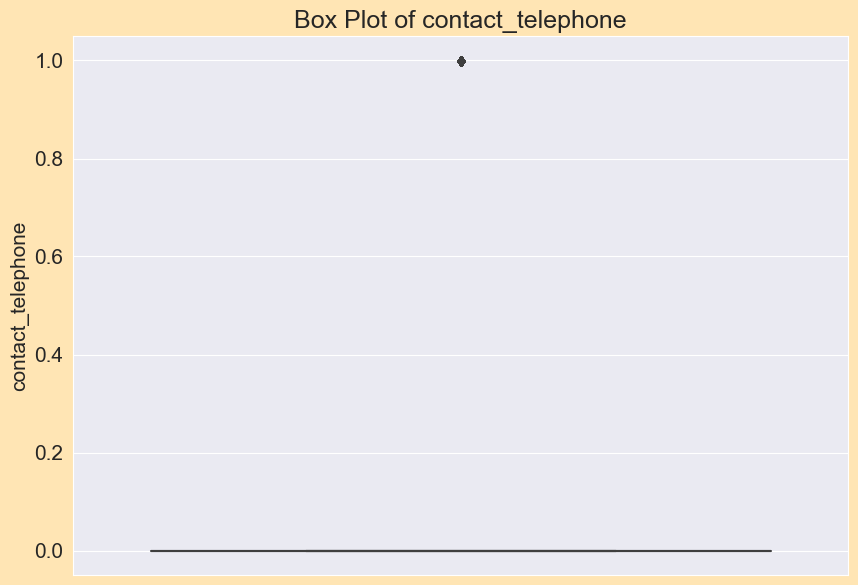

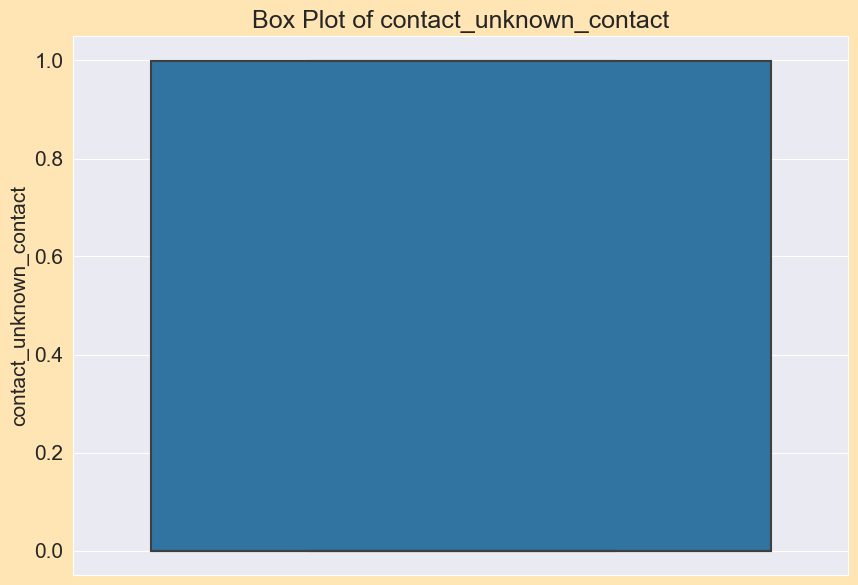

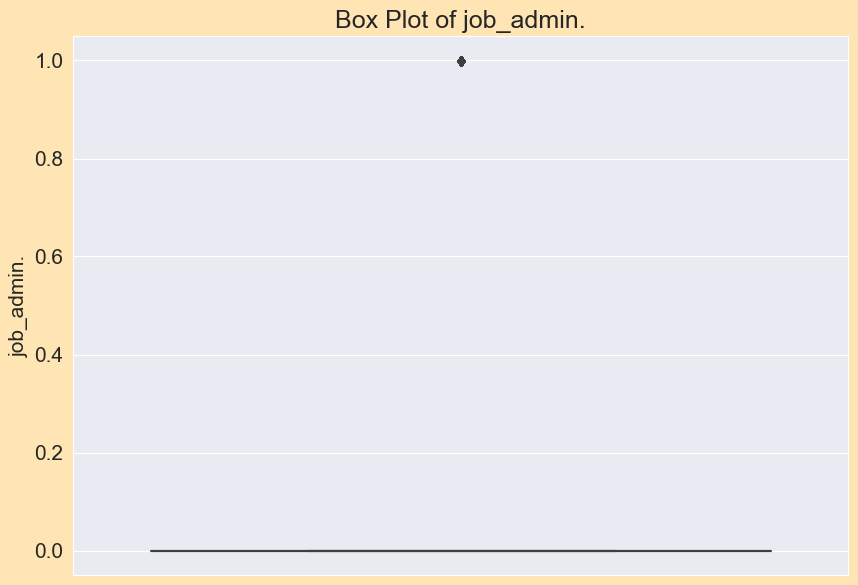

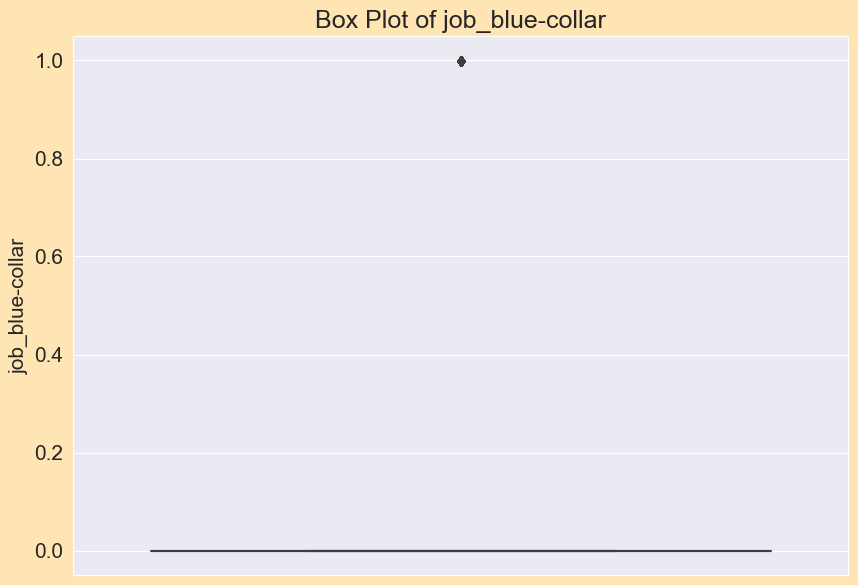

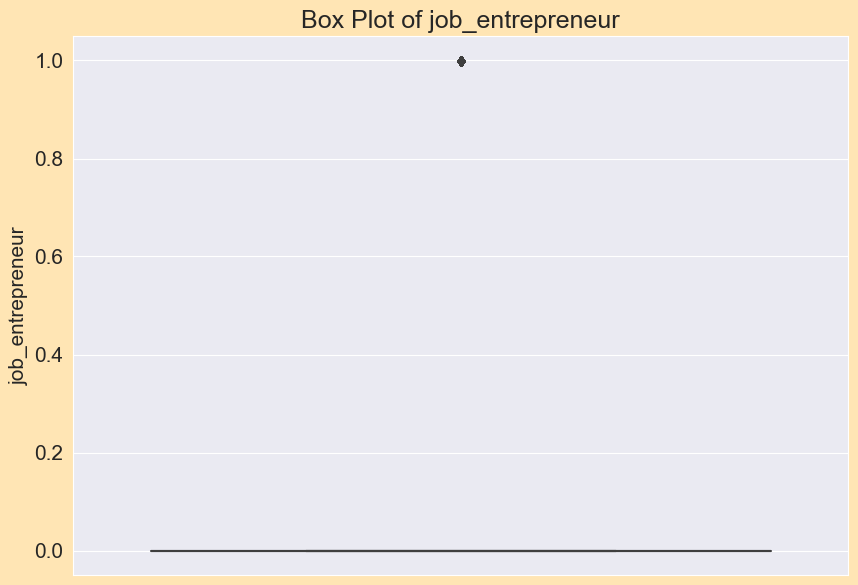

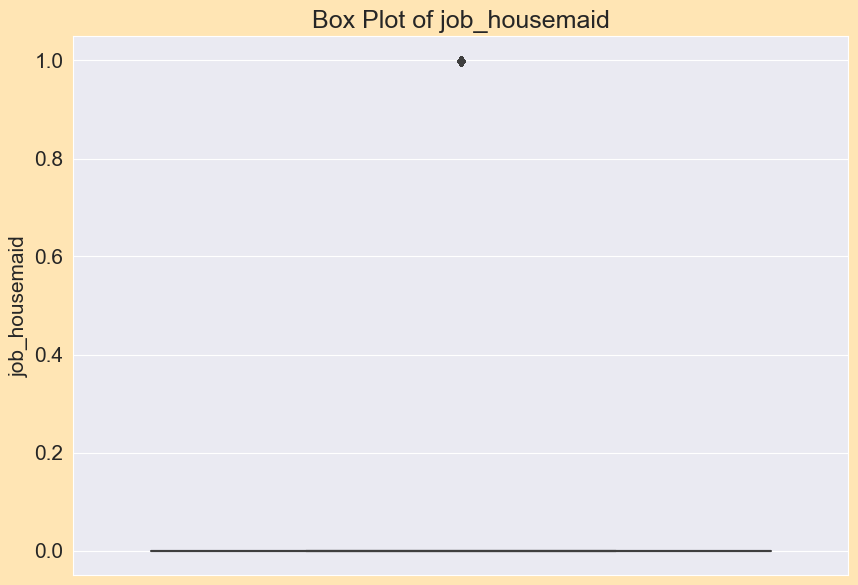

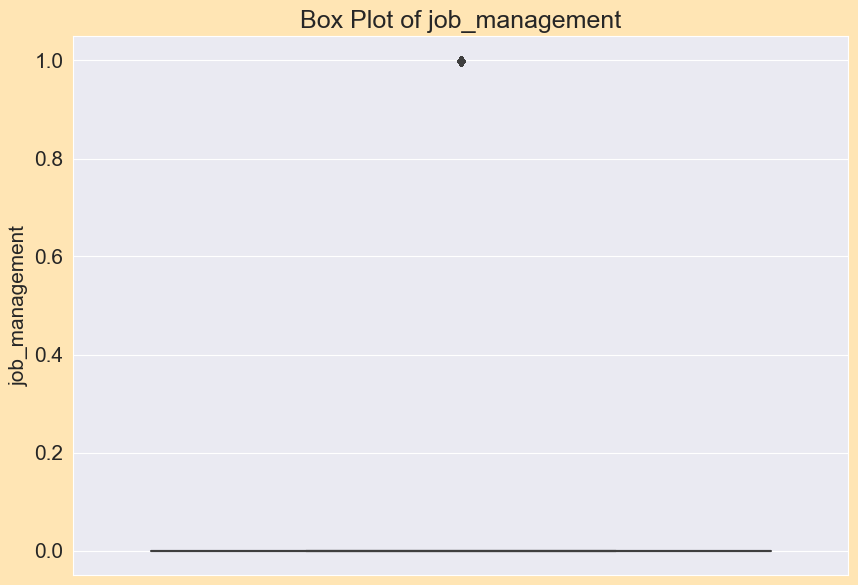

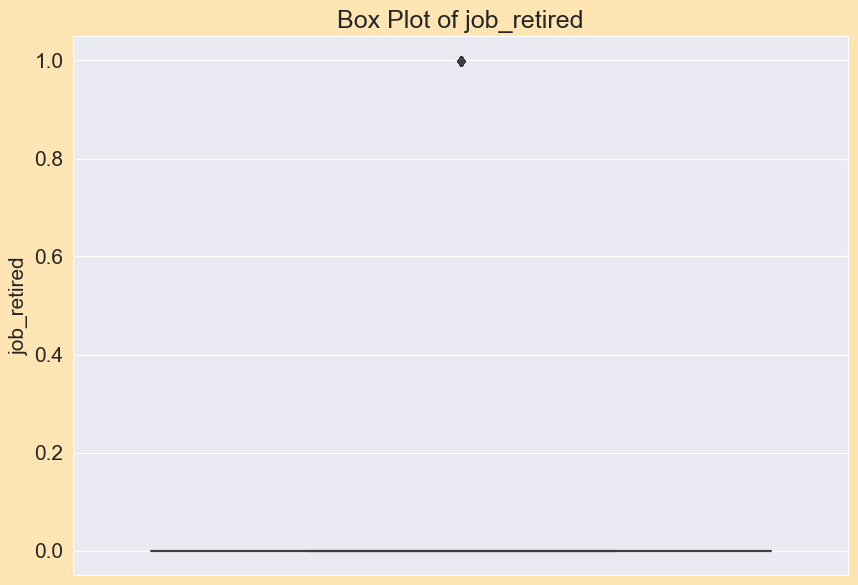

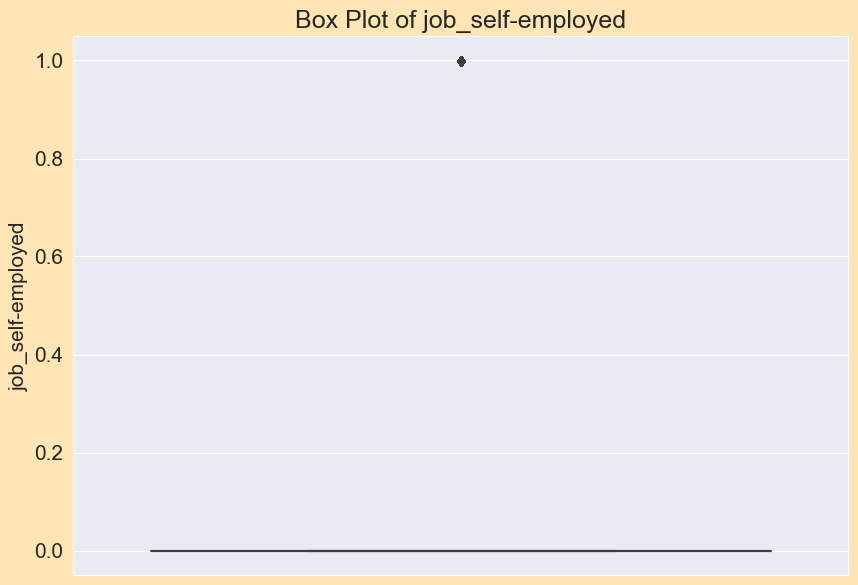

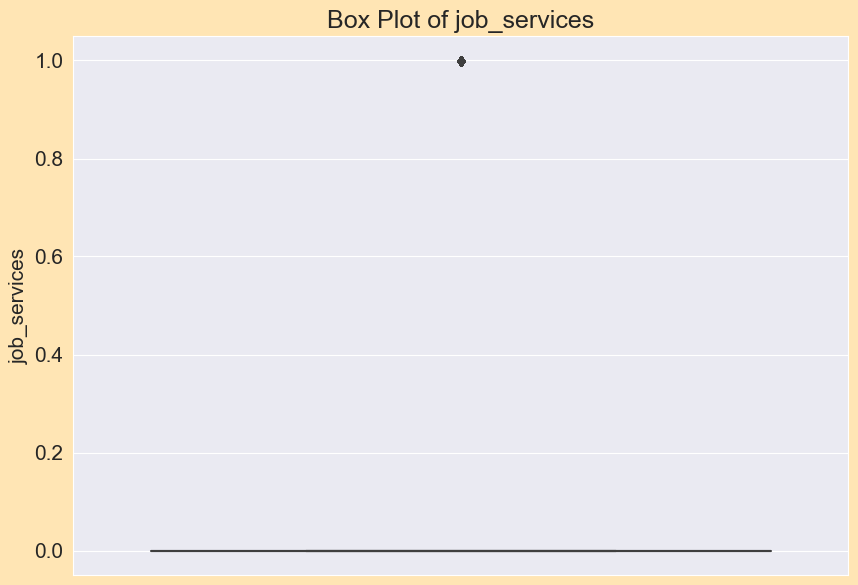

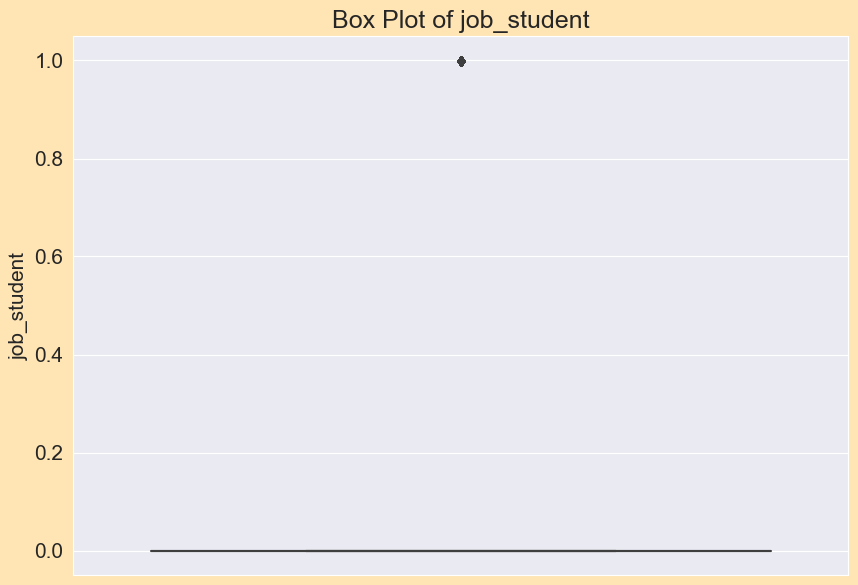

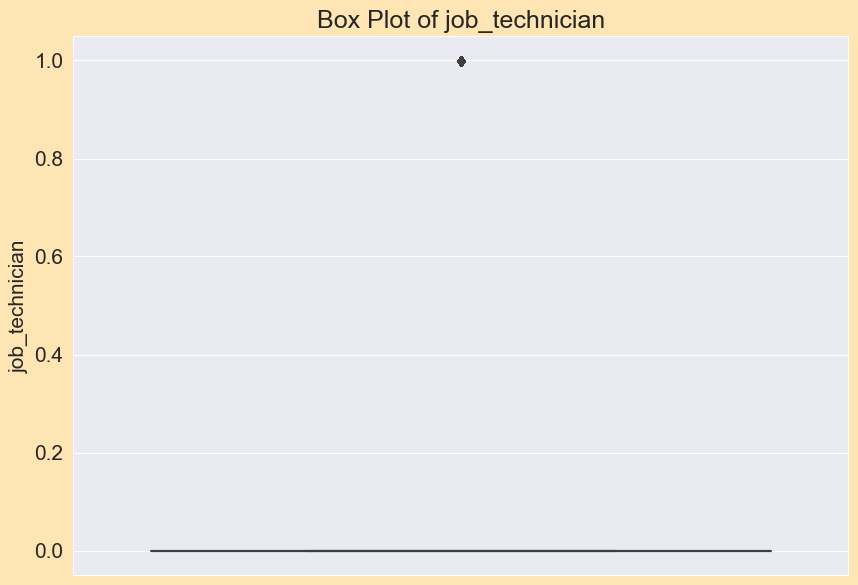

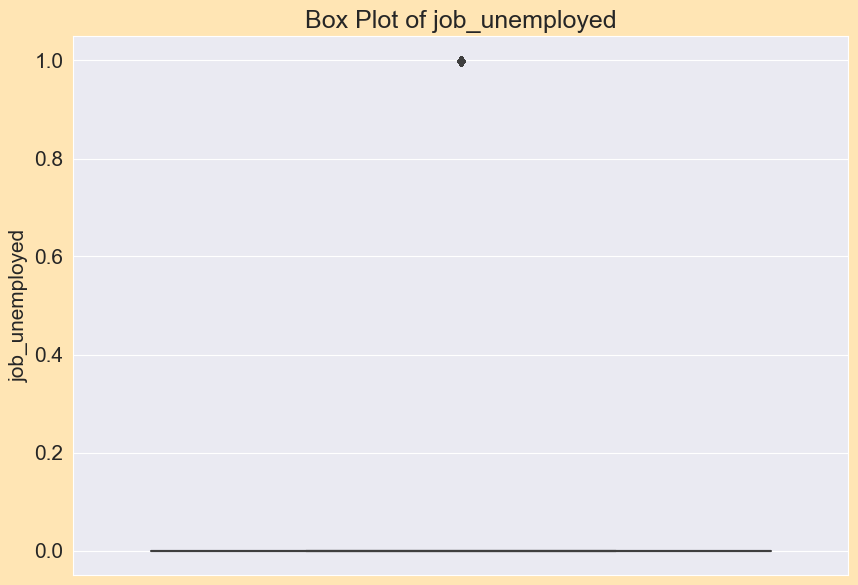

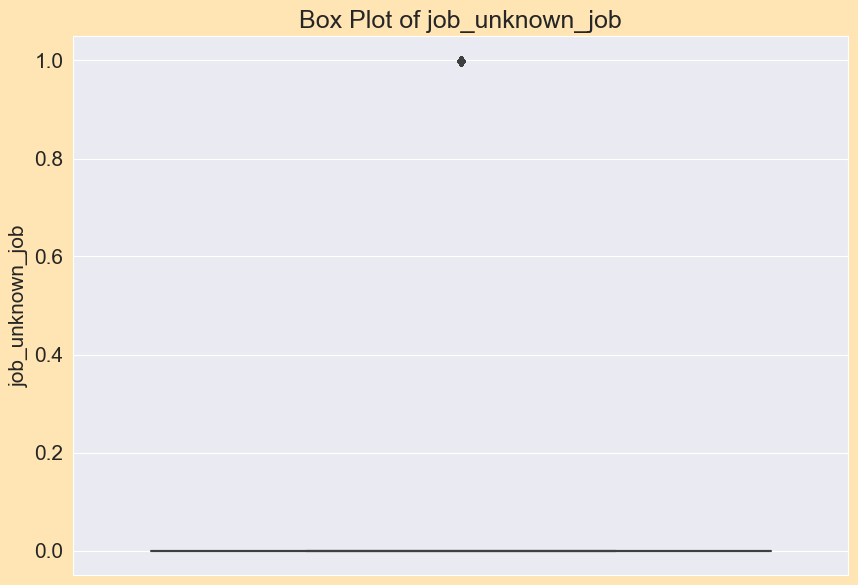

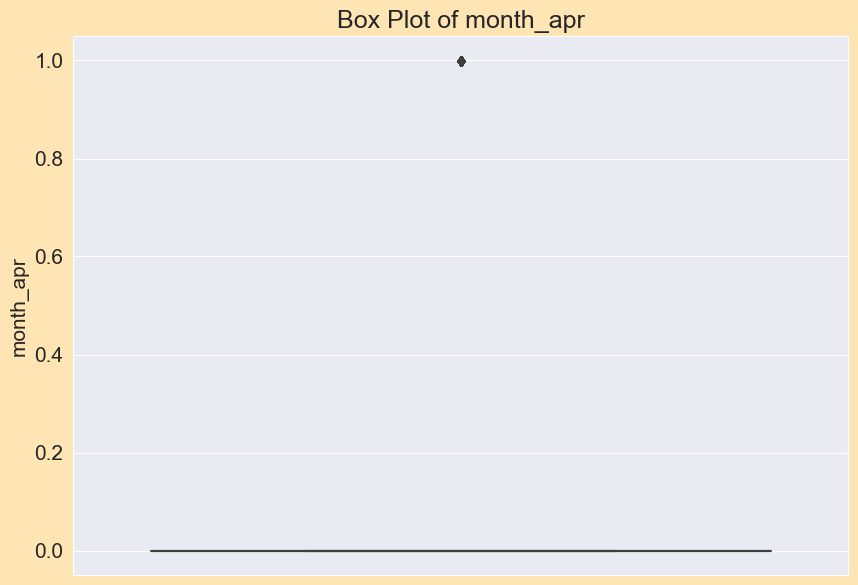

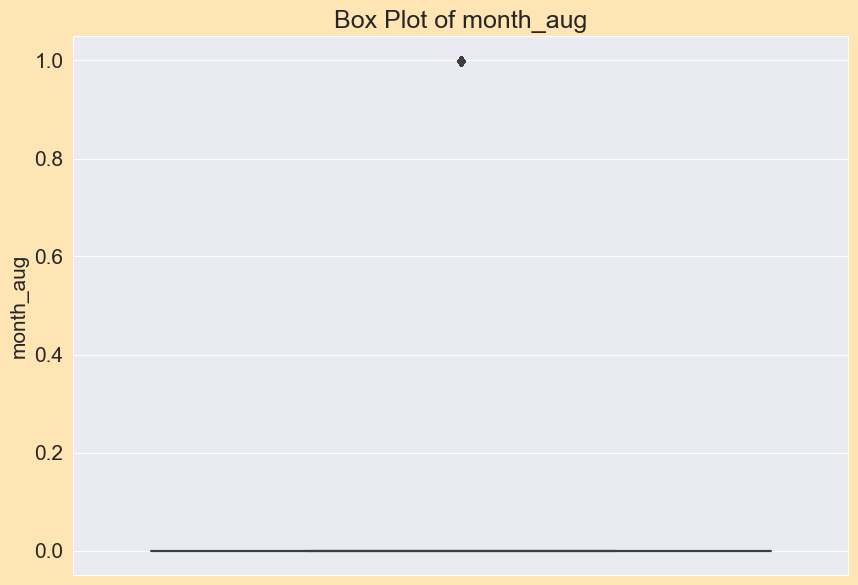

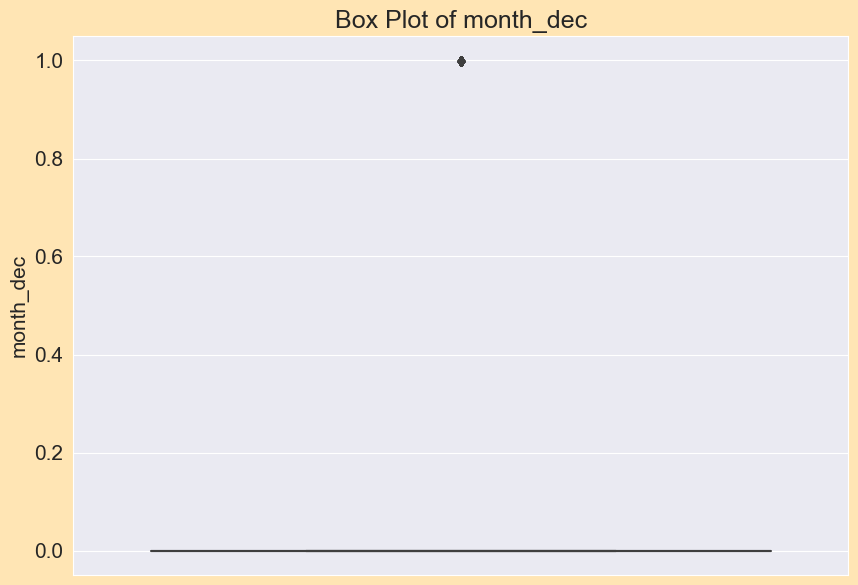

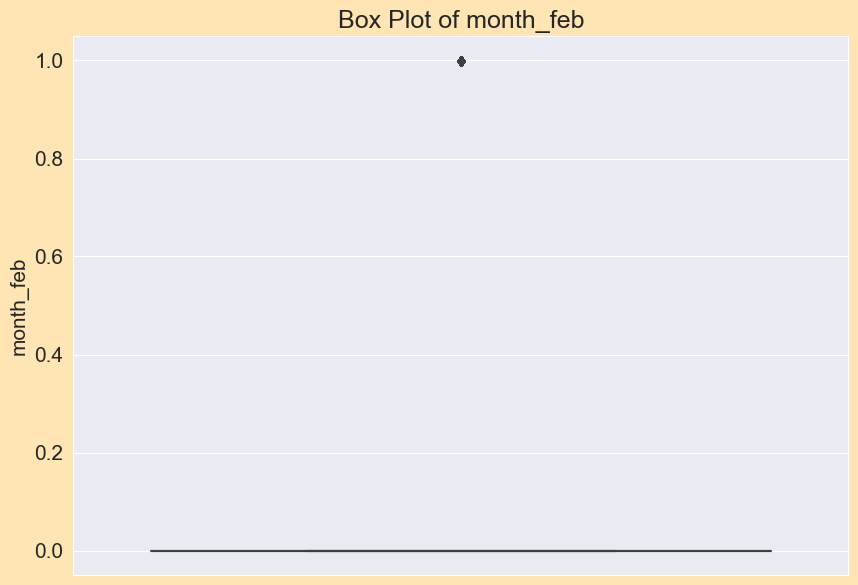

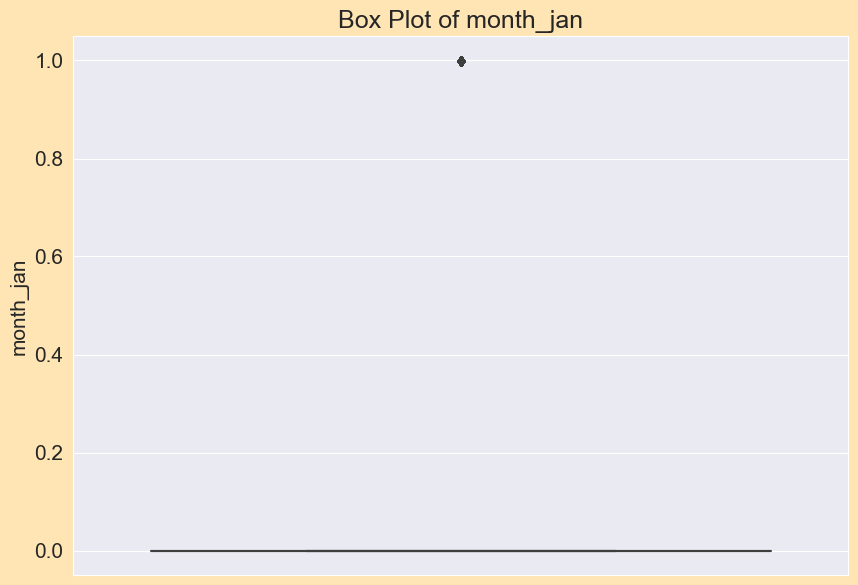

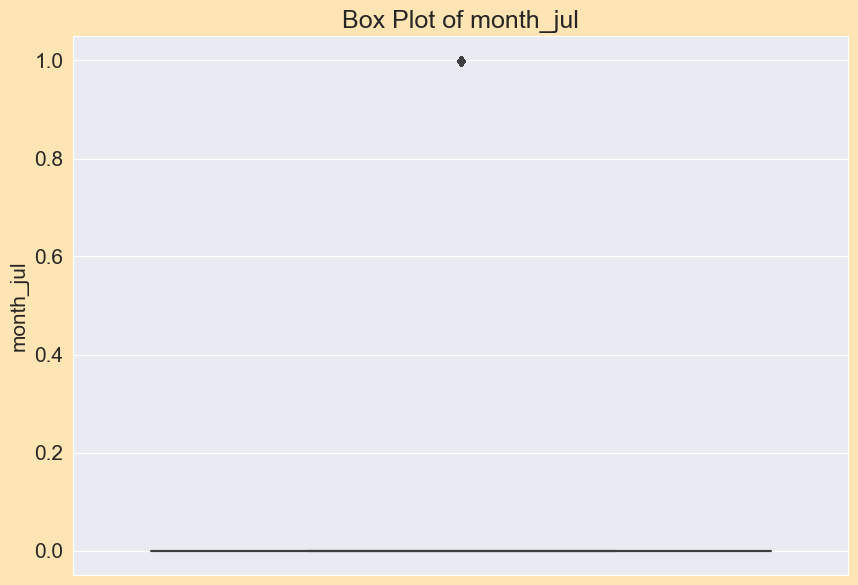

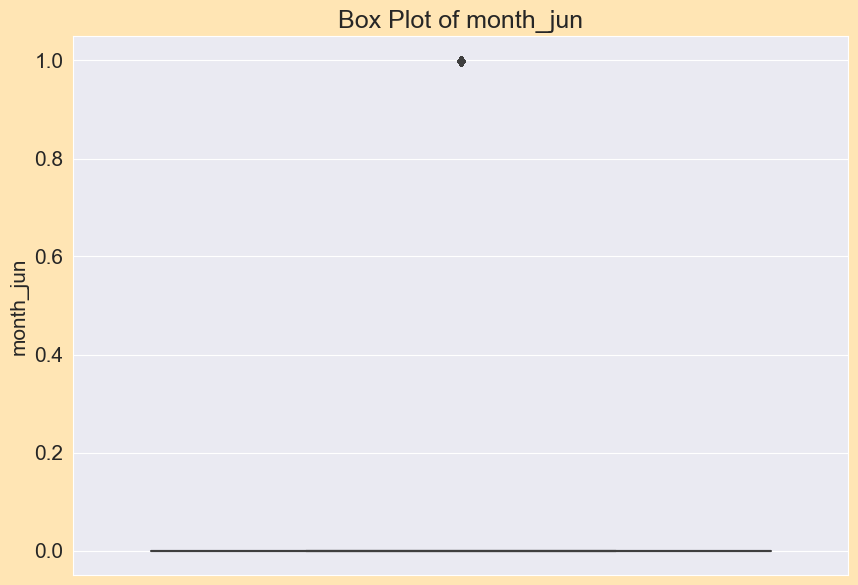

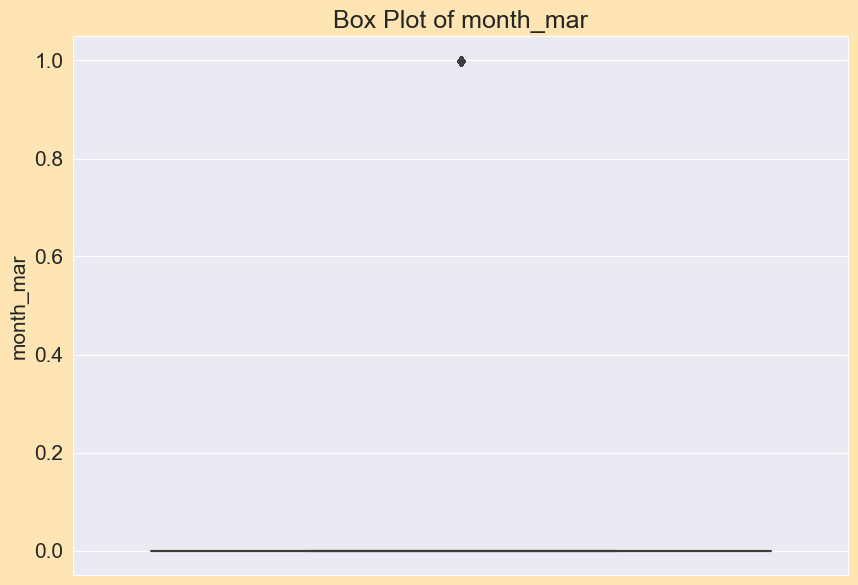

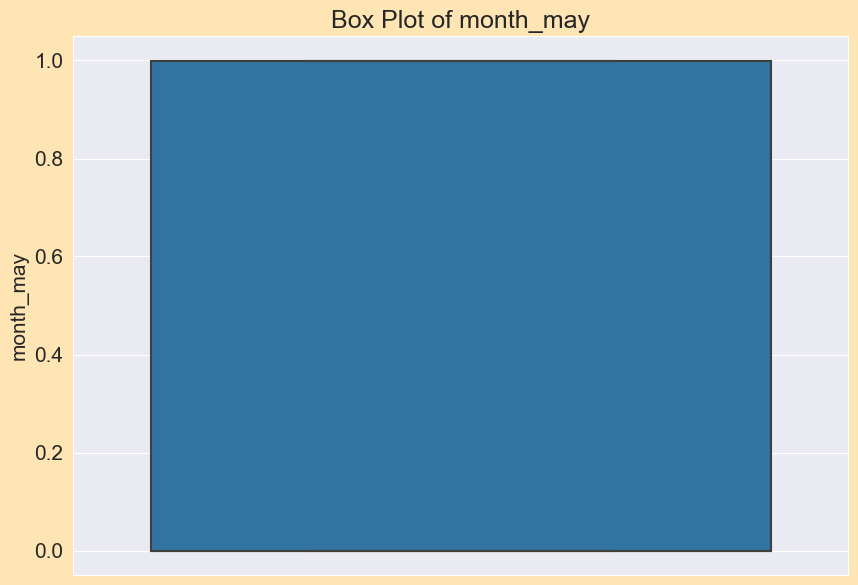

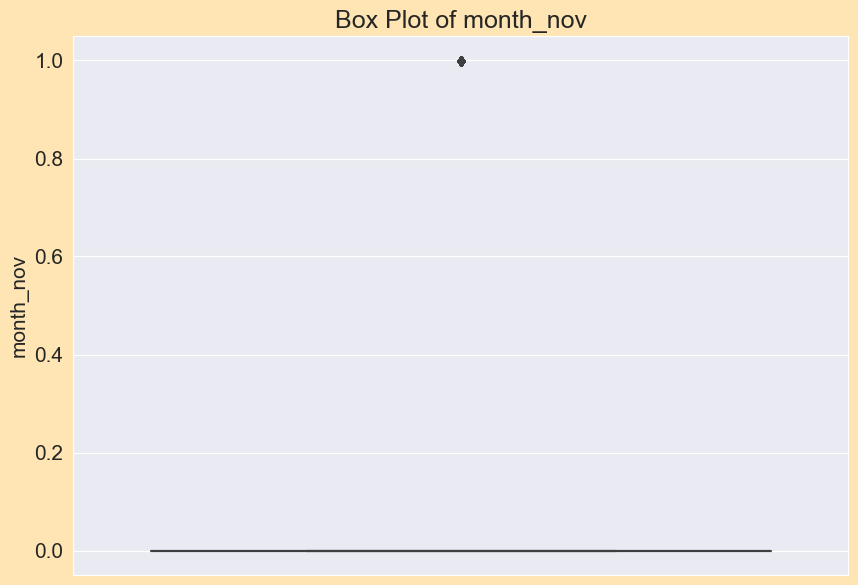

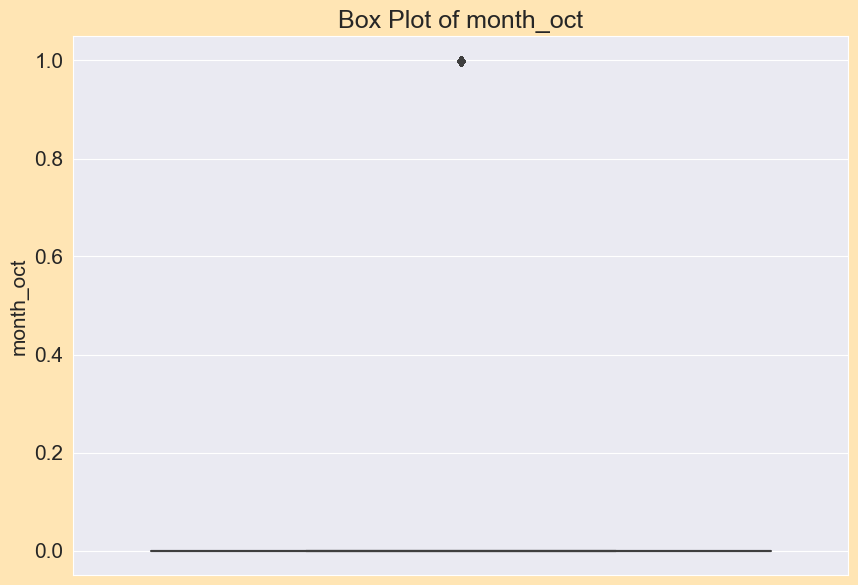

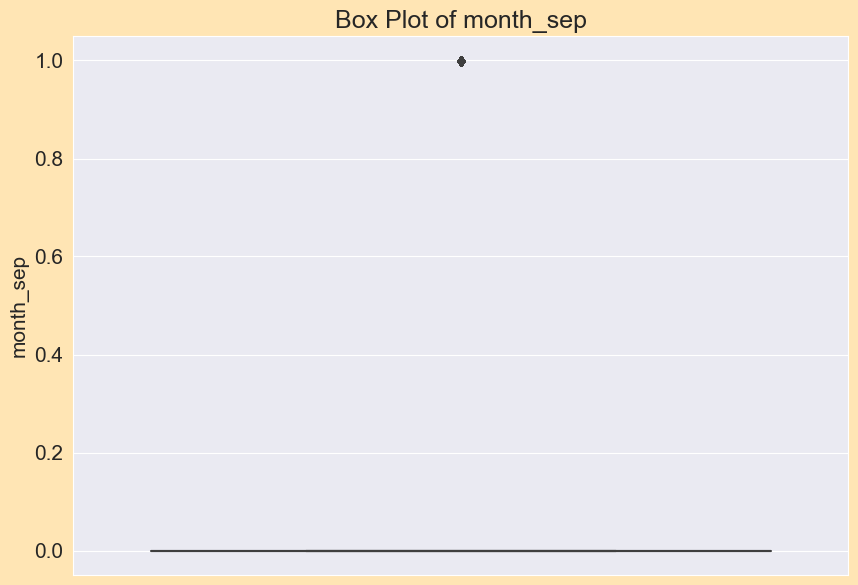

In [209]:
for i in dfcopy.columns:
    sns.boxplot(y=i,data=dfcopy)
    plt.title(f'Box Plot of {i}')
    plt.ylabel(i)
    plt.show()

#### There are ouliers present in balance, age,duration, pdays,previous columns. However since i am using random forest classifier, i will not be treating ouliers, for the model will itself handle outliers.

In [211]:
dfcopy['balance'].max()

102127

In [212]:
dfcopy['balance'].min()

-8019

In [221]:
dfcopy[dfcopy['balance']>2000]

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed,education_encoded,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown_poutcome,contact_cellular,contact_telephone,contact_unknown_contact,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown_job,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
3,57,2,0,3287,0,0,22,867,1,84,3,1,2.0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
17,64,1,0,6251,0,0,5,125,7,-1,0,0,2.0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
18,44,1,0,4031,1,0,7,983,4,-1,0,1,0.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
25,31,1,0,4720,1,0,13,460,2,-1,0,0,2.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
26,60,1,0,17413,0,0,9,200,1,-1,0,0,0.0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31624,50,1,0,5108,1,0,19,140,2,-1,0,0,2.0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31625,56,1,0,8741,1,0,20,318,3,-1,0,0,2.0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31633,50,1,0,3117,0,0,9,174,1,-1,0,0,2.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31637,44,1,0,5163,0,0,11,48,2,-1,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [222]:
dfcopy[dfcopy['balance']<0]

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed,education_encoded,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown_poutcome,contact_cellular,contact_telephone,contact_unknown_contact,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown_job,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
11,35,1,0,-151,1,0,5,96,2,-1,0,0,1.0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
30,31,0,0,-205,1,0,3,56,12,-1,0,0,2.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
32,46,1,0,-768,1,0,8,194,3,-1,0,0,0.0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
52,58,2,0,-71,0,0,27,114,1,-1,0,0,2.0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
60,36,1,0,-78,1,0,6,346,1,-1,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31599,39,1,1,-345,1,0,7,69,1,-1,0,0,1.0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
31605,31,1,0,-30,1,1,17,804,2,-1,0,0,1.0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31618,21,0,1,-59,1,1,4,83,1,-1,0,0,1.0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
31627,35,0,0,-2,0,0,6,15,1,-1,0,0,1.0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


#### The balance column has many negative values but i will leave it as it is since it is significant information thats tells us the wealth status of clients. Some are rich and some are in debts.

In [210]:
dfcopy.describe()

,age,marital,default,balance,housing,loan,day,duration,campaign,pdays,previous,subscribed,education_encoded,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown_poutcome,contact_cellular,contact_telephone,contact_unknown_contact,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown_job,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.00000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,0.832780,0.018485,1363.890258,0.555629,0.162132,15.835466,258.113534,2.765697,39.576042,0.574272,0.117389,1.058931,0.106234,0.040699,0.033747,0.819319,0.645338,0.064682,0.28998,0.114734,0.216197,0.031851,0.027617,0.209783,0.049736,0.035485,0.091731,0.020065,0.167694,0.028597,0.006509,0.064935,0.136917,0.004961,0.057731,0.030872,0.153063,0.118115,0.010807,0.305527,0.087939,0.016178,0.012955
std,10.625134,0.607186,0.134700,3028.304293,0.496904,0.368578,8.337097,257.118973,3.113830,99.317592,2.422529,0.321888,0.780034,0.308142,0.197595,0.180581,0.384759,0.478418,0.245968,0.45376,0.318706,0.411657,0.175607,0.163876,0.407160,0.217403,0.185006,0.288650,0.140225,0.373600,0.166673,0.080419,0.246415,0.343765,0.070260,0.233237,0.172973,0.360054,0.322750,0.103394,0.460637,0.283210,0.126164,0.113084
min,18.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,0.000000,0.000000,73.000000,0.000000,0.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,1.000000,0.000000,450.000000,1.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,48.000000,1.000000,0.000000,1431.000000,1.000000,0.000000,21.000000,318.500000,3.000000,-1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,95.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


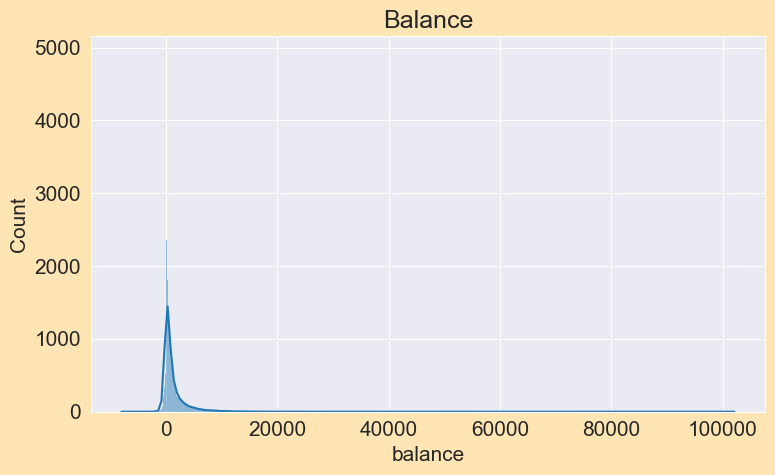

In [216]:
plt.figure(figsize=(8,5))
sns.histplot(dfcopy['balance'], kde=True)
plt.title('Balance')

plt.tight_layout()
plt.show()

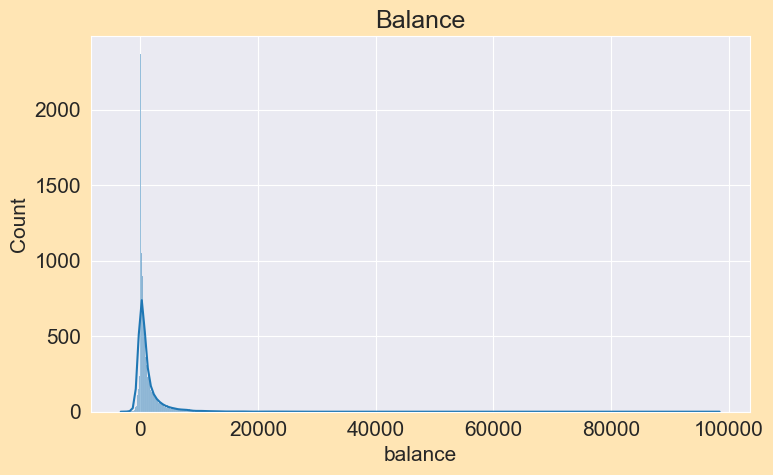

In [257]:
plt.figure(figsize=(8,5))
sns.histplot(dftest['balance'], kde=True)
plt.title('Balance')

plt.tight_layout()
plt.show()

In [225]:
#Defining x and y
dfcopy_x=dfcopy.drop('subscribed',axis=1)

In [228]:
dfcopy_y=dfcopy['subscribed']

In [ ]:
# We are using smote to balance the y label in training dataset
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
dfcopyx_resampled, dfcopyy_resampled = smote.fit_resample(dfcopy_x, dfcopy_y)

In [233]:
dfcopyy_resampled.value_counts()

0    27932
1    27932
Name: subscribed, dtype: int64

In [261]:
#Splitting training dataset into train and test just so i can check the accuracy score and classification report of the model
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(dfcopyx_resampled, dfcopyy_resampled,test_size=0.25,random_state=42)

In [262]:
#Training the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

newrfc=RandomForestClassifier()
newrfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [265]:
#Making prediction for xtest
pred2=newrfc.predict(xtest)

In [266]:
print("Accuracy Score:", accuracy_score(ytest,pred2))

Accuracy Score: 0.946942574824574


In [267]:
print(classification_report(ytest,pred2))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7021
           1       0.96      0.94      0.95      6945

    accuracy                           0.95     13966
   macro avg       0.95      0.95      0.95     13966
weighted avg       0.95      0.95      0.95     13966



### The Accuracy score of 95% is excellent and also both categories are getting predicted quite qccurately with 94% and 96% accuracy score.

In [269]:
# Checking/Comparing number of columns in training and testing dataset
len(dfcopyx_resampled.columns)

43

In [268]:
len(dftest_copy.columns)

43

In [270]:
#Predicting target for test dataset
dftest_copy_predicted=newrfc.predict(dftest_copy)

In [272]:
len(dftest_copy_predicted)

13564

In [273]:
len(dftest_copy)

13564

In [277]:
dftest_copy_predicted

array([0, 1, 0, ..., 0, 1, 0])

# The targets/(Subscribed,Unsubscribed) are predicted for test dataset